# Group Case Study 

## Telecom Churn Case Study(Machine learning - II)

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
- Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

- In churn prediction, we assume that there are three phases of customer lifecycle :

    - The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    - The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    - The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Goals
1. To predict customers who will churn
2. Identifying important predictor attributes which help the business understand indicators of churn.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 300)

## Step 1: Reading and Understanding the Data

In [3]:
#Loading the data from csv file

telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Checking the shape of the dataset
telecom_data.shape

(99999, 226)

In [5]:
# Checking the column wise info of the dataset
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking the numerical columns statistically
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# create backup of data
copied_data = telecom_data.copy()

In [8]:
# Displaying the columns of data
columns = list(telecom_data.columns)
print(columns)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

## Step 2: Data Preparation

In [9]:
#As we can see last 4 columns of above dataset has month name as part of their name. 
#Unlike other columns which have month number as a suffix.
# lets make the 4 columns similar to other column name format
telecom_data = telecom_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                                            'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'})

In [10]:
# Checking categorical columns in data
cat_col = list(telecom_data.select_dtypes(include='object'))
cat_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
date_cols = [x for x in columns if 'date' in x]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [12]:
# Converting date-time features to pd.datetime
telecom_data[date_cols]=telecom_data[date_cols].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))

In [13]:
telecom_data[date_cols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0           2014-09-30          2014-06-21          2014-07-16   
1           2014-09-30          2014-06-29          2014-07-31   
2           2014-09-30          2014-06-17          2014-07-24   
3           2014-09-30          2014-06-28          2014-07-31   
4           2014-09-30          2014-06-26          2014-07-28   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0          2014-08-08          2014-09-28               2014-06-21   
1          2014-08-28          2014-09-30                      NaT   
2          2014-08-14          2014-09-29                      NaT   
3          2014-08-31          2014-09-30                      NaT   
4          2014-08-09          2014-09-28               2014-06-04   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0               2014-07-16               2014-08-08                      NaT  
1               2014-07-25               2014-08-10                      NaT  
2                      NaT                      NaT               2014-09-17  
3                      NaT                      NaT                      NaT  
4                      NaT                      NaT                      NaT

In [14]:
# Checking the shape of the dataset again
telecom_data.shape

(99999, 226)

#### Handling missing values

In [15]:
# Missing values along columns
round(100*telecom_data.isnull().sum()/len(telecom_data.index),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64

#### Inference:
As, the data here is very huge and as mentioned in problem statement we need to predict churn only for the high-value customers.
Lets first extract the high value customers before we perform anyother operations on data.

High-Value Customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

i.e., 70% of the average recharge amount in June and July.

##### This means we have to check the columns cotaining information about total recharge amount to get high-value customers.

In [16]:
rech_cols = [x for x in columns if 'rech' in x]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [17]:
#Lets look into columns which are important to identify high value customers
#check if they have null values
# Missing values along rechanrge columns
round(100*telecom_data[rech_cols].isnull().sum()/len(telecom_data.index),2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
total_rech_data_6           74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
count_rech_3g_9             74.08
max_rech_data_8             73.66
total_rech_data_8           73.66
count_rech_2g_8             73.66
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
max_rech_amt_9               0.00
max_rech_amt_8

In [18]:
impute = [(round(100*telecom_data[rech_cols].isnull().sum()[telecom_data.isnull().sum()>0]/len(telecom_data.index),4).sort_values(ascending=False)).index]
impute

[Index(['max_rech_data_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6',
        'count_rech_3g_6', 'total_rech_data_6', 'count_rech_2g_6',
        'max_rech_data_7', 'av_rech_amt_data_7', 'date_of_last_rech_data_7',
        'count_rech_3g_7', 'count_rech_2g_7', 'total_rech_data_7',
        'date_of_last_rech_data_9', 'total_rech_data_9', 'av_rech_amt_data_9',
        'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
        'av_rech_amt_data_8', 'max_rech_data_8', 'total_rech_data_8',
        'count_rech_2g_8', 'date_of_last_rech_data_8', 'count_rech_3g_8',
        'date_of_last_rech_9', 'date_of_last_rech_8', 'date_of_last_rech_7',
        'date_of_last_rech_6'],
       dtype='object')]

#### Let's consider if the total_rech_data and the max_rech_data both has missing values then, the customer has not done any recharge for mobile interenet for that month. We can also take the column date_of_last_rech_data indicating the date of the last recharge made as reference.
#### Hence the columns can be imputed as 0.

In [19]:
# Checking missing values in data recharge based column for each month and imputing if date_of_last_rech_data is also missing.

count_total_6 = 0
count_max_6 = 0
count_total_7 = 0
count_max_7 = 0
count_total_8 = 0
count_max_8 = 0
count_total_9 = 0
count_max_9 = 0

for i in range(len(telecom_data)):
    if (pd.isnull(telecom_data['total_rech_data_6'][i]) and (pd.isnull(telecom_data['max_rech_data_6'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            count_total_6 += 1
            count_max_6 += 1

    if (pd.isnull(telecom_data['total_rech_data_7'][i]) and (pd.isnull(telecom_data['max_rech_data_7'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            count_total_7 += 1
            count_max_7 += 1

    if (pd.isnull(telecom_data['total_rech_data_8'][i]) and (pd.isnull(telecom_data['max_rech_data_8'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            count_total_8 += 1
            count_max_8 += 1

    if (pd.isnull(telecom_data['total_rech_data_9'][i]) and (pd.isnull(telecom_data['max_rech_data_9'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            count_total_9 += 1
            count_max_9 += 1

print('For month 6: ',count_total_6, count_max_6)
print('For month 7: ',count_total_7, count_max_7)
print('For month 8: ',count_total_8, count_max_8)
print('For month 9: ',count_total_9, count_max_9)

For month 6:  74846 74846
For month 7:  74428 74428
For month 8:  73660 73660
For month 9:  74077 74077


In [20]:
# Checking missing values in data recharge based column for each month and imputing if date_of_last_rech_data is also missing.
count_av_6 = 0
count_2g_6 = 0
count_3g_6 = 0
count_av_7 = 0
count_2g_7 = 0
count_3g_7 = 0
count_av_8 = 0
count_2g_8 = 0
count_3g_8 = 0
count_av_9 = 0
count_2g_9 = 0
count_3g_9 = 0

for i in range(len(telecom_data)):
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (pd.isnull(telecom_data['count_rech_2g_6'][i]))  and (pd.isnull(telecom_data['count_rech_3g_6'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            count_av_6 += 1 
            count_2g_6 += 1
            count_3g_6 += 1
            

    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (pd.isnull(telecom_data['count_rech_2g_7'][i]))  and (pd.isnull(telecom_data['count_rech_3g_7'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            count_av_7 += 1 
            count_2g_7 += 1
            count_3g_7 += 1
            
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (pd.isnull(telecom_data['count_rech_2g_8'][i]))  and (pd.isnull(telecom_data['count_rech_3g_8'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            count_av_8 += 1 
            count_2g_8 += 1
            count_3g_8 += 1
            
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (pd.isnull(telecom_data['count_rech_2g_9'][i]))  and (pd.isnull(telecom_data['count_rech_3g_9'][i]))):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            count_av_9 += 1 
            count_2g_9 += 1
            count_3g_9 += 1
            
print('For month 6: ',count_av_6, count_2g_6, count_3g_6)
print('For month 7: ',count_av_7, count_2g_7, count_3g_7)
print('For month 8: ',count_av_8, count_2g_8, count_3g_8)
print('For month 9: ',count_av_9, count_2g_9, count_3g_9)

For month 6:  74846 74846 74846
For month 7:  74428 74428 74428
For month 8:  73660 73660 73660
For month 9:  74077 74077 74077


In [21]:
#we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.
impute_col = ['max_rech_data_6', 'av_rech_amt_data_6','count_rech_3g_6', 'total_rech_data_6', 'count_rech_2g_6',
              'max_rech_data_7', 'av_rech_amt_data_7','count_rech_3g_7', 'count_rech_2g_7', 
              'total_rech_data_7', 'total_rech_data_9', 'av_rech_amt_data_9','max_rech_data_9', 'count_rech_2g_9', 
              'count_rech_3g_9','av_rech_amt_data_8', 'max_rech_data_8', 'total_rech_data_8',
              'count_rech_2g_8', 'count_rech_3g_8']

In [22]:
#lets impute missing values with '0' to extract high value customers for these columns 
telecom_data[impute_col]=telecom_data[impute_col].fillna(0, axis=1)

In [23]:
telecom_data.shape

(99999, 226)

In [24]:
# Missing values along rechanrge columns again
round(100*telecom_data[rech_cols].isnull().sum()/len(telecom_data.index),2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
total_rech_num_9             0.00
total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
av_rech_amt_data_8           0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
total_rech_num_8             0.00
total_rech_num_7             0.00
max_rech_amt_7               0.00
av_rech_amt_data_9           0.00
total_rech_data_6            0.00
count_rech_2g_8              0.00
av_rech_amt_data_7           0.00
av_rech_amt_data_6           0.00
count_rech_3g_9              0.00
count_rech_3g_8              0.00
count_rech_3g_7              0.00
count_rech_3g_6              0.00
count_rech_2g_

Based on above analysis we can say that all the missing dates in last data recharge column are due to the customer did not recharge in that month. Thus we can either delete this columns as there are many missing values and equivalently total_rech_data columns give us an idea about which customer didn't recharge

#### Above date related columns can be dropped from the dataset as total_rech_amt columns for data and calling gives us insigths for that month.
#### As we are not doing any tine-based analysis we can drop these columns

In [25]:
# Dropping date related columns from the dataset
telecom_data.drop(date_cols,axis=1,inplace=True)
telecom_data.shape

(99999, 214)

### Let's now derive few features based on available features which will help us to identify high-value customers

### Deriving new Features 

In [26]:
#As we can see in the data we have 2 different columns per month for 2G and 3G data recharge.
# lets add those values for each month 
# Note: (Month 9 will be removed later on as we need to predict values for 9th month itself)

telecom_data['total_count_rech_data_6'] = (telecom_data['count_rech_2g_6'] + telecom_data['count_rech_3g_6']).astype(int)
telecom_data['total_count_rech_data_7'] = (telecom_data['count_rech_2g_7'] + telecom_data['count_rech_3g_7']).astype(int)
telecom_data['total_count_rech_data_8'] = (telecom_data['count_rech_2g_8'] + telecom_data['count_rech_3g_8']).astype(int)

In [27]:
telecom_data.shape

(99999, 217)

In [28]:
#lets derive a feature with total amount spent on recharging data monthly
# We can do that by multiplying average data recharge amount multiplied by number of times recharge was done 
#i.e, above generated feature

telecom_data['total_rech_amt_data_6'] = telecom_data['total_count_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_rech_amt_data_7'] = telecom_data['total_count_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_rech_amt_data_8'] = telecom_data['total_count_rech_data_8'] * telecom_data['av_rech_amt_data_8']

In [29]:
telecom_data.shape

(99999, 220)

In [30]:
#Now, that we have data and call recharge amounts seperately for a month.
#lets calculate total monthly recharge for data and call by adding the two columns

telecom_data['total_monthly_rech_amt_6'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_data_6']
telecom_data['total_monthly_rech_amt_7'] = telecom_data['total_rech_amt_7'] + telecom_data['total_rech_amt_data_7']
telecom_data['total_monthly_rech_amt_8'] = telecom_data['total_rech_amt_8'] + telecom_data['total_rech_amt_data_8']

In [31]:
telecom_data.shape

(99999, 223)

In [32]:
# look at the 70th percentile recharge amount for month June, July
avg_70 = telecom_data[['total_monthly_rech_amt_6','total_monthly_rech_amt_7']].mean(axis=1).quantile(0.7)
print('70th Percentile of the avg recharge amount: ', avg_70)

70th Percentile of the avg recharge amount:  478.0


In [33]:
# # look at the 70th percentile recharge amount for month June, July
# temp_avg_70 = telecom_data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1).quantile(0.7)
# print('70th Percentile of the avg recharge amount: ', temp_avg_70)

In [34]:
# # Extracting the high-value custmer data only from given dataset based on above percentile condition

# temp_data = telecom_data[telecom_data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)>= temp_avg_70]
# temp_data.shape

In [35]:
# Extracting the high-value custmer data only from given dataset based on above percentile condition

high_value_data = telecom_data[telecom_data[['total_monthly_rech_amt_6','total_monthly_rech_amt_7']].mean(axis=1)>= avg_70]

In [36]:
# Checking the dataset shapes before and after extracting high-value customers

print('Before: ', telecom_data.shape)
print('After: ', high_value_data.shape)

Before:  (99999, 223)
After:  (30001, 223)


In [37]:
# Missing values along rechanrge columns
pd.set_option('display.max_rows', 300)
round(100*high_value_data.isnull().sum()[high_value_data.isnull().sum()>0]/len(high_value_data.index),4).sort_values(ascending=False)

fb_user_9           49.2684
night_pck_user_9    49.2684
arpu_3g_9           49.2684
arpu_2g_9           49.2684
arpu_2g_8           46.8251
fb_user_8           46.8251
night_pck_user_8    46.8251
arpu_3g_8           46.8251
arpu_3g_6           44.1485
arpu_2g_6           44.1485
night_pck_user_6    44.1485
fb_user_6           44.1485
arpu_2g_7           43.1452
night_pck_user_7    43.1452
arpu_3g_7           43.1452
fb_user_7           43.1452
og_others_9          6.3365
loc_og_mou_9         6.3365
std_ic_t2f_mou_9     6.3365
roam_og_mou_9        6.3365
std_ic_t2m_mou_9     6.3365
spl_og_mou_9         6.3365
std_ic_t2t_mou_9     6.3365
loc_og_t2f_mou_9     6.3365
loc_og_t2t_mou_9     6.3365
loc_og_t2c_mou_9     6.3365
loc_ic_mou_9         6.3365
loc_og_t2m_mou_9     6.3365
loc_ic_t2f_mou_9     6.3365
loc_ic_t2t_mou_9     6.3365
isd_og_mou_9         6.3365
roam_ic_mou_9        6.3365
std_ic_mou_9         6.3365
std_ic_t2o_mou_9     6.3365
std_og_t2t_mou_9     6.3365
ic_others_9         

#### Checking the columns which are having only 1 unique value in it. Such columns can be dropped from the dataset as they cannot give significant insights for analysis and will have no variance

In [38]:
# Create a list to store column names
drop_col=[]

for i in high_value_data.columns:
    if high_value_data[i].nunique() == 1:
        drop_col.append(i)
    else:
        pass

#telecom_data.drop(drop_col, axis=1, inplace = True)
print("\n The following Columns have unique value is 1: \n",drop_col)


 The following Columns have unique value is 1: 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [39]:
# Let's look into the values of above columns
for column in drop_col:
    print(column,':',high_value_data[column].unique())
    print(high_value_data[column].value_counts())
    print('___________________________________________________')

circle_id : [109]
109    30001
Name: circle_id, dtype: int64
___________________________________________________
loc_og_t2o_mou : [ 0. nan]
0.0    29777
Name: loc_og_t2o_mou, dtype: int64
___________________________________________________
std_og_t2o_mou : [ 0. nan]
0.0    29777
Name: std_og_t2o_mou, dtype: int64
___________________________________________________
loc_ic_t2o_mou : [ 0. nan]
0.0    29777
Name: loc_ic_t2o_mou, dtype: int64
___________________________________________________
std_og_t2c_mou_6 : [nan  0.]
0.0    29456
Name: std_og_t2c_mou_6, dtype: int64
___________________________________________________
std_og_t2c_mou_7 : [nan  0.]
0.0    29464
Name: std_og_t2c_mou_7, dtype: int64
___________________________________________________
std_og_t2c_mou_8 : [ 0. nan]
0.0    28827
Name: std_og_t2c_mou_8, dtype: int64
___________________________________________________
std_og_t2c_mou_9 : [nan  0.]
0.0    28100
Name: std_og_t2c_mou_9, dtype: int64
__________________________________

#### Inference:
1. Based on the value counts of above columns we can see that above 12 columns are having either only one value in it or have only 0 and null values. 
2. Hence, Lets drop these 12 columns from dataset as it does not give any insight for analysis

In [40]:
#looks like 3 columns have only 0 and null values.
#lets drop these 3 columns from dataset
high_value_data.drop(drop_col,inplace=True,axis=1)
high_value_data.shape

(30001, 211)

## Tag churners and remove attributes of the churn phase

- As per problem statement, Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase i.e., in month 9 are churned customers.
- Hence, 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' these 4 columns we need to check to decide churn=1, else 0.
- These 4 features does not have any missing values in them. So we can tag churners.

In [41]:
# Let's store the column names in a list
churn_col = ['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']

# As mentioned in problem statement let's apply the conditions
high_value_data['churn']=high_value_data[churn_col].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & 
                                                     (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [42]:
#Storing columns names for moth 9
month_9_col = [x for x in high_value_data.columns if '_9' in x]
month_9_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [43]:
# After tagging churners, remove all the attributes corresponding to the churn phase 
#(all attributes having ‘ _9’, etc. in their names)
high_value_data.drop(month_9_col,inplace=True,axis=1)

# # Also lets drop mobile_number column
# # creating an index column with the mobile number as its value
# hvc_index = high_value_data.pop('mobile_number')
# high_value_data.drop('mobile_number',inplace=True,axis=1)

In [44]:
# Checking the shape of our dataset
high_value_data.shape

(30001, 162)

In [45]:
#lets define a function  to find all the columns where more than given percentage of values are null.
 
def nullvalue(cutoff):
    null = (100*(high_value_data.isnull().sum())/len(high_value_data.index))
    print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
    return null.loc[null > cutoff]

In [46]:
nullvalue(40)

12 features have more than 40% null values


arpu_3g_6           44.148528
arpu_3g_7           43.145228
arpu_3g_8           46.825106
arpu_2g_6           44.148528
arpu_2g_7           43.145228
arpu_2g_8           46.825106
night_pck_user_6    44.148528
night_pck_user_7    43.145228
night_pck_user_8    46.825106
fb_user_6           44.148528
fb_user_7           43.145228
fb_user_8           46.825106
dtype: float64

In [47]:
# Code for conditional imputation

temp = high_value_data[['arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','total_rech_amt_data_6']]
temp[temp['arpu_3g_6'].isnull()]

arpu_3g_6  arpu_2g_6  night_pck_user_6  fb_user_6  \
7            NaN        NaN               NaN        NaN   
8            NaN        NaN               NaN        NaN   
21           NaN        NaN               NaN        NaN   
23           NaN        NaN               NaN        NaN   
38           NaN        NaN               NaN        NaN   
...          ...        ...               ...        ...   
99939        NaN        NaN               NaN        NaN   
99941        NaN        NaN               NaN        NaN   
99963        NaN        NaN               NaN        NaN   
99965        NaN        NaN               NaN        NaN   
99988        NaN        NaN               NaN        NaN   

       total_rech_amt_data_6  
7                        0.0  
8                        0.0  
21                       0.0  
23                       0.0  
38                       0.0  
...                      ...  
99939                    0.0  
99941                    0.0  
99963                    0.0  
99965                    0.0  
99988                    0.0  

[13245 rows x 5 columns]

#### As we can see the columns have missing values when customer has not recharged with data for that month.
#### Hence, these columns we can impute with 0

In [48]:
# We will impute others with 0 value indicating no service as these columns are important for prediction
col = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
        'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
        'fb_user_6', 'fb_user_7', 'fb_user_8']

#lets impute missing values with '0' to extract high value customers for these columns 
high_value_data[col]=high_value_data[col].fillna(0, axis=1)

In [49]:
# Checking features with missing value >3%
nullvalue(3)

27 features have more than 3% null values


onnet_mou_8         3.913203
offnet_mou_8        3.913203
roam_ic_mou_8       3.913203
roam_og_mou_8       3.913203
loc_og_t2t_mou_8    3.913203
loc_og_t2m_mou_8    3.913203
loc_og_t2f_mou_8    3.913203
loc_og_t2c_mou_8    3.913203
loc_og_mou_8        3.913203
std_og_t2t_mou_8    3.913203
std_og_t2m_mou_8    3.913203
std_og_t2f_mou_8    3.913203
std_og_mou_8        3.913203
isd_og_mou_8        3.913203
spl_og_mou_8        3.913203
og_others_8         3.913203
loc_ic_t2t_mou_8    3.913203
loc_ic_t2m_mou_8    3.913203
loc_ic_t2f_mou_8    3.913203
loc_ic_mou_8        3.913203
std_ic_t2t_mou_8    3.913203
std_ic_t2m_mou_8    3.913203
std_ic_t2f_mou_8    3.913203
std_ic_mou_8        3.913203
spl_ic_mou_8        3.913203
isd_ic_mou_8        3.913203
ic_others_8         3.913203
dtype: float64

In [50]:
# Let's check the reason behind the missing values. All the columns are related to month 8
col = ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
        'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
        'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
        'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
        'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
        'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
        'isd_ic_mou_8', 'ic_others_8']

temp = high_value_data[col]
temp[temp['onnet_mou_8'].isnull()]

onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
111            NaN           NaN            NaN            NaN   
188            NaN           NaN            NaN            NaN   
358            NaN           NaN            NaN            NaN   
527            NaN           NaN            NaN            NaN   
539            NaN           NaN            NaN            NaN   
...            ...           ...            ...            ...   
99436          NaN           NaN            NaN            NaN   
99700          NaN           NaN            NaN            NaN   
99790          NaN           NaN            NaN            NaN   
99827          NaN           NaN            NaN            NaN   
99851          NaN           NaN            NaN            NaN   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
111                 NaN               NaN               NaN               NaN   
188                 NaN               NaN               NaN               NaN   
358                 NaN               NaN               NaN               NaN   
527                 NaN               NaN               NaN               NaN   
539                 NaN               NaN               NaN               NaN   
...                 ...               ...               ...               ...   
99436               NaN               NaN               NaN               NaN   
99700               NaN               NaN               NaN               NaN   
99790               NaN               NaN               NaN               NaN   
99827               NaN               NaN               NaN               NaN   
99851               NaN               NaN               NaN               NaN   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
111             NaN               NaN               NaN               NaN   
188             NaN               NaN               NaN               NaN   
358             NaN               NaN               NaN               NaN   
527             NaN               NaN               NaN               NaN   
539             NaN               NaN               NaN               NaN   
...             ...               ...               ...               ...   
99436           NaN               NaN               NaN               NaN   
99700           NaN               NaN               NaN               NaN   
99790           NaN               NaN               NaN               NaN   
99827           NaN               NaN               NaN               NaN   
99851           NaN               NaN               NaN               NaN   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
111             NaN           NaN           NaN          NaN   
188             NaN           NaN           NaN          NaN   
358             NaN           NaN           NaN          NaN   
527             NaN           NaN           NaN          NaN   
539             NaN           NaN           NaN          NaN   
...             ...           ...           ...          ...   
99436           NaN           NaN           NaN          NaN   
99700           NaN           NaN           NaN          NaN   
99790           NaN           NaN           NaN          NaN   
99827           NaN           NaN           NaN          NaN   
99851           NaN           NaN           NaN          NaN   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
111                 NaN               NaN               NaN           NaN   
188                 NaN               NaN               NaN           NaN   
358                 NaN               NaN               NaN           NaN   
527                 NaN               NaN               NaN           NaN   
539                 NaN               NaN               NaN           NaN   
...                 ...               ...               ...           ...   
99436   

In [51]:
# Verifying the reason behind null values against recharge column of the month 8
temp = high_value_data[['onnet_mou_8', 'total_rech_data_8']]
temp[temp['onnet_mou_8'].isnull()]

onnet_mou_8  total_rech_data_8
111            NaN                0.0
188            NaN                0.0
358            NaN                0.0
527            NaN                0.0
539            NaN                0.0
...            ...                ...
99436          NaN                0.0
99700          NaN                0.0
99790          NaN                0.0
99827          NaN                0.0
99851          NaN                0.0

[1174 rows x 2 columns]

##### All the above columns seems to be having missing values when there is no recharge done for that month. Thus we can impute this columns with 0 indicating no usage of that service

In [52]:
# Storing column names
col = ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
        'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
        'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
        'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
        'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
        'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
        'isd_ic_mou_8', 'ic_others_8']

In [53]:
#lets impute missing values with '0'
high_value_data[col]=high_value_data[col].fillna(0, axis=1)

In [54]:
# Checking features with missing value >0%
nullvalue(0)

54 features have more than 0% null values


onnet_mou_6         1.816606
onnet_mou_7         1.789940
offnet_mou_6        1.816606
offnet_mou_7        1.789940
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2f_mou_6    1.816606
loc_og_t2f_mou_7    1.789940
loc_og_t2c_mou_6    1.816606
loc_og_t2c_mou_7    1.789940
loc_og_mou_6        1.816606
loc_og_mou_7        1.789940
std_og_t2t_mou_6    1.816606
std_og_t2t_mou_7    1.789940
std_og_t2m_mou_6    1.816606
std_og_t2m_mou_7    1.789940
std_og_t2f_mou_6    1.816606
std_og_t2f_mou_7    1.789940
std_og_mou_6        1.816606
std_og_mou_7        1.789940
isd_og_mou_6        1.816606
isd_og_mou_7        1.789940
spl_og_mou_6        1.816606
spl_og_mou_7        1.789940
og_others_6         1.816606
og_others_7         1.789940
loc_ic_t2t_mou_6    1.816606
loc_ic_t2t_mou_7    1.789940
loc_ic_t2m_mou

In [55]:
# Storing the column names
col = ['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
        'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
        'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
        'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
        'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
        'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
        'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
        'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',
        'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
        'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
        'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
        'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
        'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6',
        'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6',
        'ic_others_7']

In [56]:
#lets impute missing values with '0' 
high_value_data[col]=high_value_data[col].fillna(0, axis=1)

In [57]:
# Checking features with missing value >0
nullvalue(0)

0 features have more than 0% null values


Series([], dtype: float64)

In [58]:
high_value_data.shape

(30001, 162)

In [59]:
# Storing names of Categorical and numerical columns in different lists for further analysis
num_col = list(high_value_data.dtypes[high_value_data.dtypes !='object'].index)
print(num_col)
print(len(num_col))

cat_col = list(high_value_data.dtypes[high_value_data.dtypes =='object'].index)
print(cat_col)
print(len(cat_col))

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_i

In [60]:
# Checking columns representing different types of calls
local_cols = [x for x in high_value_data.columns if 'loc' in x]
std_cols = [x for x in high_value_data.columns if 'std' in x]
roam_cols = [x for x in high_value_data.columns if 'roam' in x]
isd_cols = [x for x in high_value_data.columns if 'isd' in x]
print(local_cols)
print(std_cols)
print(roam_cols)
print(isd_cols)

['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
['roam_ic_mou_6', 'roam_ic

#### Let's verify the columns storing total minutes of usage for different types of calls

In [61]:
#Deriving temperory variables to store summation of multiple local outgoing mou's. We'll delete them later

high_value_data['total_local_og_mou_6'] = high_value_data['loc_og_t2t_mou_6']+high_value_data['loc_og_t2m_mou_6']+high_value_data['loc_og_t2f_mou_6']+high_value_data['loc_og_t2c_mou_6']
high_value_data['total_local_og_mou_7'] = high_value_data['loc_og_t2t_mou_7']+high_value_data['loc_og_t2m_mou_7']+high_value_data['loc_og_t2f_mou_7']+high_value_data['loc_og_t2c_mou_7']
high_value_data['total_local_og_mou_8'] = high_value_data['loc_og_t2t_mou_8']+high_value_data['loc_og_t2m_mou_8']+high_value_data['loc_og_t2f_mou_8']+high_value_data['loc_og_t2c_mou_8']
high_value_data[['total_local_og_mou_6','total_local_og_mou_7', 'total_local_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']].head(15)

total_local_og_mou_6  total_local_og_mou_7  total_local_og_mou_8  \
0                   0.00                  0.00                  0.00   
7                 422.15                533.90                255.79   
8                 378.09                288.17                 70.18   
21                 97.04                 94.09                129.73   
23                131.90                133.67                199.85   
33                  0.00                  0.00                  0.56   
38                 63.64                 33.52                 28.44   
41                283.22                304.45                203.20   
48               1642.62                347.07                 95.69   
53                359.66                302.62                241.60   
56                166.05                130.45                132.98   
57                184.17                152.59                147.40   
61                365.08                259.81                307.98   
67                  0.00                  0.00                  0.00   
69                 48.24                 19.17                  0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  
0           0.00          0.00          0.00  
7         422.16        533.91        255.79  
8         378.09        288.18         63.04  
21         97.04         94.09        129.74  
23        131.91        133.68        182.14  
33          0.00          0.00          0.00  
38         63.64         33.53         28.44  
41        283.24        304.46        203.21  
48       1642.58        347.08         95.69  
53        357.03        300.23        241.61  
56        166.06        130.46        128.51  
57        182.08        152.61        147.41  
61        365.09        259.83        307.99  
67          0.00          0.00          0.00  
69         48.24         19.18          0.00

In [62]:
#Deriving temperory variables to store summation of multiple local incoming mou's. We'll delete them later

high_value_data['total_local_ic_mou_6'] = high_value_data['loc_ic_t2t_mou_6']+high_value_data['loc_ic_t2m_mou_6']+high_value_data['loc_ic_t2f_mou_6']
high_value_data['total_local_ic_mou_7'] = high_value_data['loc_ic_t2t_mou_7']+high_value_data['loc_ic_t2m_mou_7']+high_value_data['loc_ic_t2f_mou_7']
high_value_data['total_local_ic_mou_8'] = high_value_data['loc_ic_t2t_mou_8']+high_value_data['loc_ic_t2m_mou_8']+high_value_data['loc_ic_t2f_mou_8']
high_value_data[['total_local_ic_mou_6','total_local_ic_mou_7', 'total_local_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']].head(15)

total_local_ic_mou_6  total_local_ic_mou_7  total_local_ic_mou_8  \
0                   0.00                  0.00                  5.44   
7                 427.86                355.21                188.03   
8                  81.42                 23.82                 15.79   
21                125.32                 87.66                159.09   
23                116.62                174.40                224.19   
33                  3.48                  0.87                 40.54   
38                 46.67                 28.52                 29.42   
41                 83.42                252.98                 60.63   
48               1212.37                460.13                154.25   
53                592.08                738.03                534.24   
56                185.15                135.83                163.76   
57                320.50                447.79                403.94   
61                913.03                822.35                990.53   
67                  6.41                 61.86                 45.59   
69                255.67                410.43                  7.71   

    loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  
0           0.00          0.00          5.44  
7         427.88        355.23        188.04  
8          81.43         23.83         15.79  
21        125.33         87.68        159.11  
23        116.63        174.41        224.21  
33          3.48          0.88         40.54  
38         46.68         28.53         29.43  
41         83.43        252.99         60.64  
48       1212.39        460.14        154.26  
53        592.09        738.04        534.24  
56        185.16        135.84        163.76  
57        320.51        447.81        403.96  
61        913.04        822.36        990.54  
67          6.41         61.86         45.59  
69        255.68        410.44          7.71

In [63]:
#Deriving temperory variables to store summation of multiple std outgoing mou's. We'll delete them later

high_value_data['total_std_og_mou_6'] = high_value_data['std_og_t2t_mou_6']+high_value_data['std_og_t2m_mou_6']+high_value_data['std_og_t2f_mou_6']
high_value_data['total_std_og_mou_7'] = high_value_data['std_og_t2t_mou_7']+high_value_data['std_og_t2m_mou_7']+high_value_data['std_og_t2f_mou_7']
high_value_data['total_std_og_mou_8'] = high_value_data['std_og_t2t_mou_8']+high_value_data['std_og_t2m_mou_8']+high_value_data['std_og_t2f_mou_8']
high_value_data[['total_std_og_mou_6','total_std_og_mou_7', 'total_std_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']].head(15)

total_std_og_mou_6  total_std_og_mou_7  total_std_og_mou_8  std_og_mou_6  \
0                 0.00                0.00                0.00          0.00   
7                60.85               75.13               77.83         60.86   
8               130.25              143.47               98.27        130.26   
21              763.29              934.68              938.78        763.29   
23                2.36                6.35               39.61          2.36   
33                0.00                0.00                0.00          0.00   
38              274.20              637.01              735.73        274.21   
41               34.68               94.89               13.18         34.68   
48             1506.80              792.22              129.38       1506.81   
53               30.66               52.44                5.23         30.66   
56                0.00                0.00                1.93          0.00   
57               32.68                3.03               61.66         32.68   
61                0.00               12.06                7.20          0.00   
67                0.00                0.00                0.00          0.00   
69             1742.13             1791.90                0.00       1742.14   

    std_og_mou_7  std_og_mou_8  
0           0.00          0.00  
7          75.14         77.84  
8         143.48         98.28  
21        934.69        938.79  
23          6.35         39.61  
33          0.00          0.00  
38        637.01        735.74  
41         94.89         13.18  
48        792.23        129.39  
53         52.44          5.23  
56          0.00          1.93  
57          3.03         61.66  
61         12.06          7.20  
67          0.00          0.00  
69       1791.91          0.00

### Inference
- As we can from above analysis, features 'loc_og_mou_6', 'loc_ic_mou_6' represents the sum of all different 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6' and incoming mou for month 6. Same is applicable for month 7 and 8.
- Similarly, for std incoming and outgoing calls we observe the same. 
- hence, we can remove the features and keep the column representing the summation i.e., loc_og_mou, loc_ic_mou, std_ic_mou and std_og_mou.
- Also, we can remove columns of 2g and 3g for each month as they can be explained by 'total_count_rech_data_6', 'total_count_rech_data_7','total_count_rech_data_8' columns for each month
- We can drop max_rech_amt column as average recharge amount columns are available to explain the variance

In [64]:
# Making a list of columns to be dropped

drop_col = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
           'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
            'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 
            'loc_og_t2c_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 
            'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
           'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
            'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8','std_ic_t2t_mou_6', 
            'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
            'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_std_og_mou_6','total_std_og_mou_7', 
            'total_std_og_mou_8', 'total_local_ic_mou_6','total_local_ic_mou_7', 'total_local_ic_mou_8', 
            'total_local_og_mou_6','total_local_og_mou_7', 'total_local_og_mou_8','max_rech_amt_6', 
            'max_rech_amt_7', 'max_rech_amt_8']
len(drop_col)

57

In [65]:
# Dropping columns
high_value_data.drop(drop_col,axis=1,inplace=True)
high_value_data.shape

(30001, 114)

In [66]:
# Checking all data related and network based columns
data_2g_cols = [x for x in high_value_data.columns if '_2g' in x]
data_3g_cols = [x for x in high_value_data.columns if '_3g' in x]
data_cols = [x for x in high_value_data.columns if 'data' in x]
print(data_2g_cols)
print(data_3g_cols)
print(data_cols)

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']
['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_count_rech_data_6', 'total_count_rech_data_7', 'total_count_rech_data_8', 'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8']


### Feature Engineering for data based columns

In [67]:
#count of total 2G usage per month churn vs Non-Churn (To check type of network 2g or 3g gives insight regarding churn or not)
high_value_data.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].count()

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
churn                                       
0            27560        27560        27560
1             2441         2441         2441

In [68]:
#count of total 3G usage per month churn vs Non-Churn
high_value_data.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].count()

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
churn                                       
0            27560        27560        27560
1             2441         2441         2441

In [69]:
# Combining all the 2g and 3g network columns into single data based columns for every month

high_value_data['arpu_data_6'] = high_value_data['arpu_2g_6'] + high_value_data['arpu_3g_6'] 
high_value_data['arpu_data_7'] = high_value_data['arpu_2g_7'] + high_value_data['arpu_3g_7']
high_value_data['arpu_data_8'] = high_value_data['arpu_2g_8'] + high_value_data['arpu_3g_8']


high_value_data['vol_data_mb_6'] = high_value_data['vol_2g_mb_6'] + high_value_data['vol_3g_mb_6'] 
high_value_data['vol_data_mb_7'] = high_value_data['vol_2g_mb_7'] + high_value_data['vol_3g_mb_7']
high_value_data['vol_data_mb_8'] = high_value_data['vol_2g_mb_8'] + high_value_data['vol_3g_mb_8']


high_value_data['monthly_data_6'] = high_value_data['monthly_2g_6'] + high_value_data['monthly_3g_6'] 
high_value_data['monthly_data_7'] = high_value_data['monthly_2g_7'] + high_value_data['monthly_3g_7']
high_value_data['monthly_data_8'] = high_value_data['monthly_2g_8'] + high_value_data['monthly_3g_8']


high_value_data['sachet_data_6'] = high_value_data['sachet_2g_6'] + high_value_data['sachet_3g_6'] 
high_value_data['sachet_data_7'] = high_value_data['sachet_2g_7'] + high_value_data['sachet_3g_7']
high_value_data['sachet_data_8'] = high_value_data['sachet_2g_8'] + high_value_data['sachet_3g_8']

In [70]:
# Dropping the columns to avoid multicollinearity in later stages
drop_col = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 
            'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 
            'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
            'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

high_value_data.drop(drop_col,axis=1,inplace=True)
high_value_data.shape

(30001, 102)

### Feature Engineering from AON column

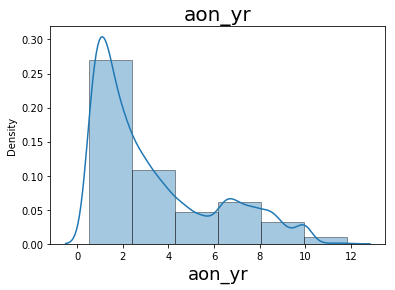

In [71]:
# lets now conevrt AON in months
high_value_data['aon_yr'] = high_value_data['aon']/365

#Let's visualize the distribution of sale price
plt.figure()
sns.distplot(high_value_data['aon_yr'],hist_kws={'edgecolor':'black'}, bins = 6)
plt.title('aon_yr', fontsize = 20)                  # Plot heading 
plt.xlabel('aon_yr', fontsize = 18)                         # X-label
plt.show()

In [72]:
high_value_data.drop(['aon'], axis=1, inplace=True)

### Categorical columns

In [73]:
#total count of total 2G usage per month churn vs Non-Churn
high_value_data.groupby(['churn'])['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'].count()

night_pck_user_6  night_pck_user_7  night_pck_user_8
churn                                                      
0                 27560             27560             27560
1                  2441              2441              2441

In [74]:
#total count of total 2G usage per month churn vs Non-Churn
high_value_data.groupby(['churn', 'night_pck_user_6'])['night_pck_user_6'].count()

churn  night_pck_user_6
0      0.0                 27191
       1.0                   369
1      0.0                  2403
       1.0                    38
Name: night_pck_user_6, dtype: int64

In [75]:
#total count of total 2G usage per month churn vs Non-Churn
high_value_data.groupby(['churn'])['fb_user_6', 'fb_user_7', 'fb_user_8'].count()

fb_user_6  fb_user_7  fb_user_8
churn                                 
0          27560      27560      27560
1           2441       2441       2441

In [76]:
#converting from int type to object to treat the variables as categorical variables
cat_col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']
high_value_data[cat_col] = high_value_data[cat_col].astype('object')

In [77]:
# Storing names of Categorical and numerical columns in different lists for further analysis
num_col = list(high_value_data.dtypes[high_value_data.dtypes !='object'].index)
print(num_col)
print(len(num_col))

cat_col = list(high_value_data.dtypes[high_value_data.dtypes =='object'].index)
print(cat_col)
print(len(cat_col))

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_r

In [78]:
high_value_data.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
0           0.00          0.00          0.00          0.00          0.00   
7         422.16        533.91        255.79         60.86         75.14   
8         378.09        288.18         63.04        130.26        143.48   
21         97.04         94.09        129.74        763.29        934.69   
23        131.91        133.68        182.14          2.36          6.35   

    std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0           0.00           0.0          0.00          0.00           0.0   
7          77.84           0.0          0.18         10.01           4.5   
8          98.28           0.0          0.00          0.00           0.0   
21        938.79           0.0          0.00          0.00           0.0   
23         39.61           0.0          0.01          0.00           0.1   

    spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0            0.0          0.00          0.0          0.0          0.0   
7            0.0          6.50          0.0          0.0          0.0   
8            0.0         10.23          0.0          0.0          0.0   
21           0.0          0.00          0.0          0.0          0.0   
23           0.0         17.71          0.0          0.0          0.0   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
0             0.00            0.00            0.00          0.00   
7           487.53          609.24          350.16        427.88   
8           508.36          431.66          171.56         81.43   
21          860.34         1028.79         1068.54        125.33   
23          134.38          140.04          239.48        116.63   

    loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
0           0.00          5.44          0.00          0.00          0.00   
7         355.23        188.04        180.54        173.08        193.94   
8          23.83         15.79         22.43          4.66          0.75   
21         87.68        159.11         81.76         44.21        101.93   
23        174.41        224.21          2.94         14.89         57.29   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
0             0.00            0.00            5.44          0.00   
7           626.46          558.04          428.74          0.21   
8           103.86           28.49           16.54          0.00   
21          207.09          131.89          261.04          0.00   
23          119.58          222.89    

## Checking Imbalance in Target Variable

In [79]:
high_value_data['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [80]:
# print churn ratio
print("Churn Ratio:")
print(high_value_data.churn.value_counts()*100/high_value_data.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [81]:
high_value_data.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count   30001.000000   30001.000000  30001.000000  30001.000000  30001.000000   
mean       20.152086      19.865615    254.080388    255.116292    235.728174   
std        96.100428     104.719009    378.339061    375.418979    363.370172   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000     32.260000     34.480000     22.460000   
50%         0.000000       0.000000    124.540000    127.880000    110.810000   
75%         0.000000       0.000000    332.090000    333.390000    310.610000   
max      2812.040000    5337.040000  10643.380000   7674.780000  11039.910000   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     347.125955    363.984508    307.379315      2.171525      2.105743   
std      608.629048    639.799336    608.976504     45.852190     45.545227   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.380000      0.150000      0.000000      0.000000      0.000000   
50%       45.130000     43.980000     25.480000      0.000000      0.000000   
75%      465.390000    499.290000    357.230000      0.000000      0.000000   
max     8432.990000  10936.730000  13980.060000   5900.660000   5490.280000   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.948970      5.818270      7.108646      6.557204      0.661092   
std       44.712024     17.567237     21.788304     20.311857      4.107960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.210000   

## Step 3: Exploratory Data Analysis

### Univariate Analysis

In [82]:
# Let's define a function to visualize distribution of a feature
def univariate_plot(col, n):
    plt.figure()
    sns.distplot(high_value_data[col], bins = n)
    plt.title(col, fontsize = 20)                  # Plot heading 
    plt.xlabel(col, fontsize = 18)                  # X-label
    plt.show()

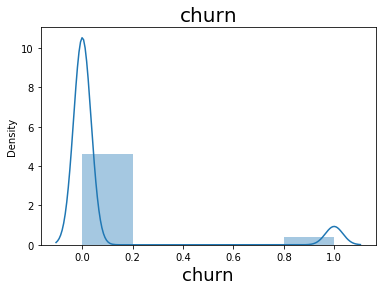

In [83]:
univariate_plot('churn', 5)

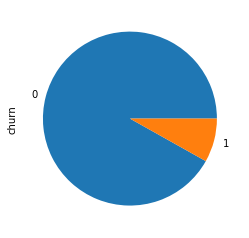

In [84]:
# Visualizing using a pie chart
((high_value_data['churn'].value_counts()/len(high_value_data))*100).plot(kind="pie")
plt.show()

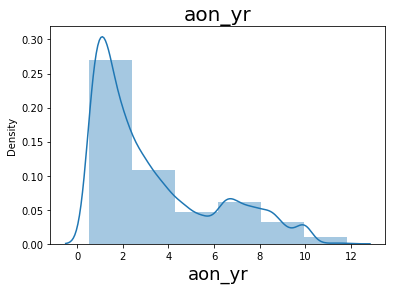

In [85]:
univariate_plot('aon_yr', 6)

### Bivariate Analysis

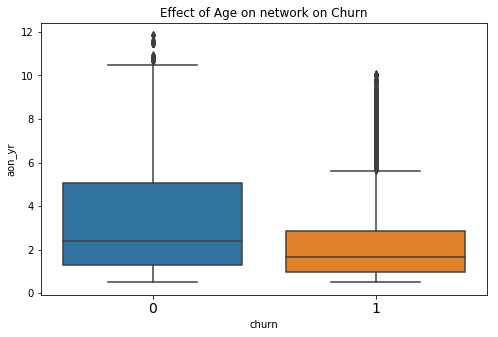

In [86]:
# Feature AON distribution and it's effect on customer churn using box plot

plt.figure(figsize=(8,5))

plt.title('Effect of Age on network on Churn')
plt.xlabel('Age of Network in Year')
plt.xticks(fontsize=14)
sns.boxplot(data = high_value_data, x='churn', y = 'aon_yr')
plt.show()

#### Inference:
- Customers with less than 3 years of age of network are more likely to churn and company should concentrate more on those customers by offering them new schems.
- Customers with more than 2-3 years of network usage are more likely to stay loyal with the network.

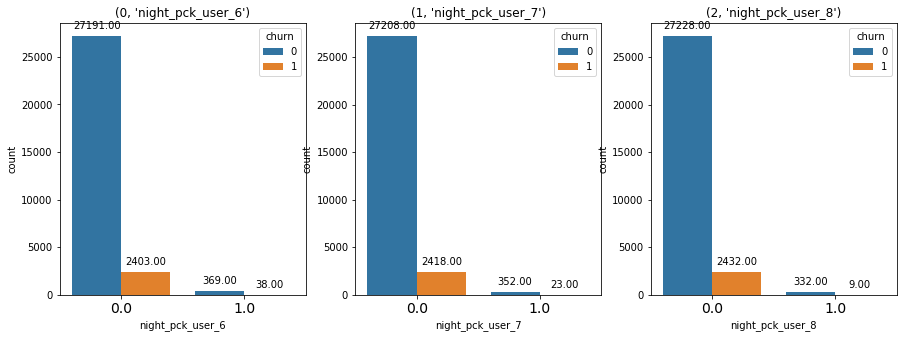

In [87]:
# Effect of Night pack Usage on Customer churn
var = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14)
    splot = sns.countplot(data = high_value_data, x=i[1], hue = 'churn')
    plt.subplots_adjust(hspace=0.3)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

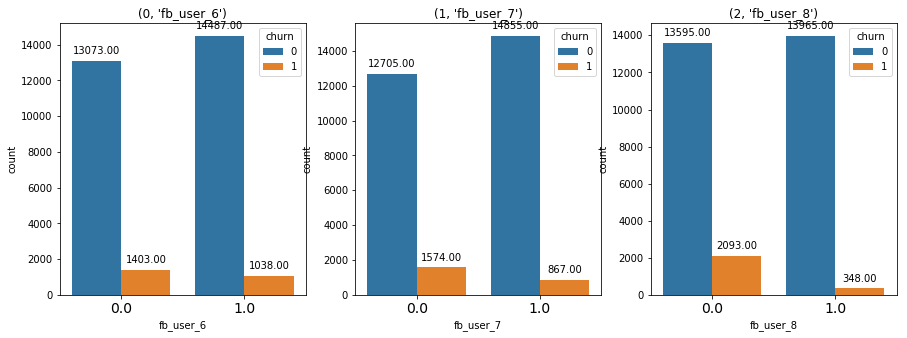

In [88]:
# Effect of FB Usage on Customer churn
var = ['fb_user_6', 'fb_user_7', 'fb_user_8']
fig = plt.figure(figsize=(15,5))

for i in enumerate(var):
    plt.subplot(1, 3, i[0]+1)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.xticks(fontsize=14)
    splot = sns.countplot(data = high_value_data, x=i[1], hue = 'churn')
    plt.subplots_adjust(hspace=0.3)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### Inference:
- Fb user or night pack users doesn't seem to give important insights to determine churn

In [89]:
# Lets define a function to see distribution of same fields in each month using box plot.

def bivariate_plot(col1, col2, col3):
    var = [col1, col2, col3]
    fig = plt.figure(figsize=(15,5))

    for i in enumerate(var):
        plt.subplot(1, 3, i[0]+1)
        plt.title('Effect of {} on Churn'.format(i))
        plt.xlabel(i)
        plt.xticks(fontsize=14)
        sns.boxplot(data = high_value_data, x='churn', y = i[1])
        plt.subplots_adjust(hspace=0.3) #wspace=0.4

    plt.show()

### Effect of Avg Revenue on Churn

In [90]:
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].mean())
print('\n',high_value_data.groupby(['churn'])['arpu_data_6', 'arpu_data_7', 'arpu_data_8'].mean())

           arpu_6      arpu_7      arpu_8
churn                                    
0      549.220390  562.608191  532.635710
1      663.158246  540.165968  237.200793

        arpu_data_6  arpu_data_7  arpu_data_8
churn                                       
0       130.571098   136.425580   128.734139
1       129.045965    98.290442    35.752446


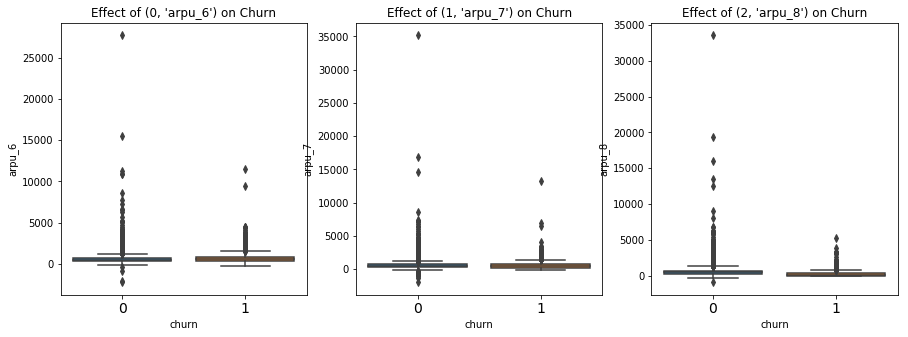

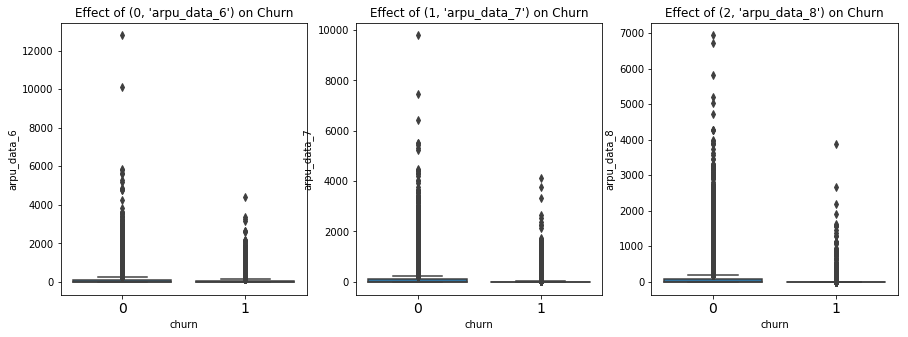

In [91]:
bivariate_plot('arpu_6', 'arpu_7', 'arpu_8')
bivariate_plot('arpu_data_6', 'arpu_data_7', 'arpu_data_8')

#### Inference:
- As we can see the revenue produced by the churned customers in the 8th month is almost close to zero
- We can say that the customers who contribute to a high revenue in the month would be loyal towards the network and will not churn.
- But on the lower side of the graph, some customers are seems to be loyal with the network (churn=0) and some are churning.
- Hence, revenue column alone will not help us understand customer churn.

### Effect of Recharge amount on Churn

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
churn                                                      
0            649.574710        663.527830        613.701089
1            786.707087        626.290045        253.152806

        total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8
churn                                                                     
0                 460.077071             545.056789             496.885741
1                 407.229283             338.293761              83.523376


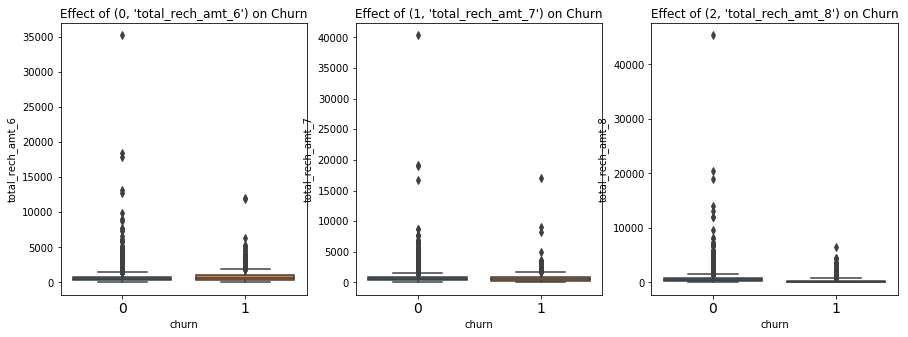

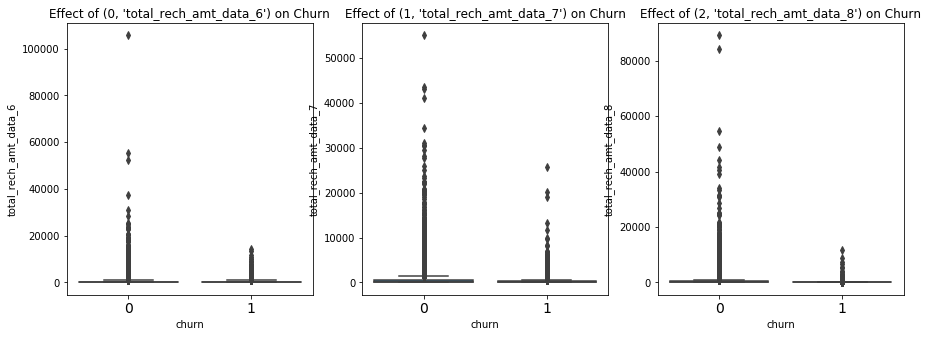

In [92]:
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'].mean())
print('\n',high_value_data.groupby(['churn'])['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8'].mean())

bivariate_plot('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8')
bivariate_plot('total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8')

#### Inference:
- We can say that the customers who recharge with high amount in the month would be loyal towards the network and will not churn.
- But again some customers are seems to be loyal with the network (churn=0) even though the recharge amount is less and some are churning. Hence, revenue column alone will not help us understand customer churn.
- We can observe decrease in the total recharge amount for churned customers in the Action Phase (Month 8).
- Similarly, there is drop in total recharge amount data column for month 8 
- The churned customers have made a very low recharge in the 8th month
- Outliers are present in all these 6 columns

### Effect of minutes of total Outgoing and Incoming calls on Customer churn

       total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          593.763075      628.442026      581.998003
1          791.678435      627.508218      209.361368

        total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.131789      306.840677      299.096525
1          231.451344      182.907534       63.444342


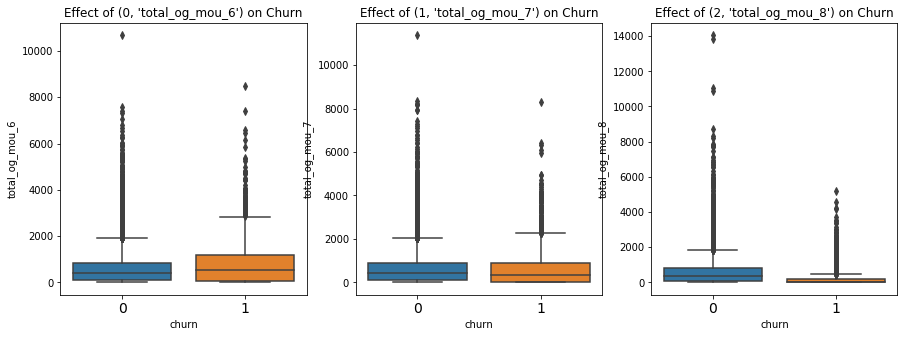

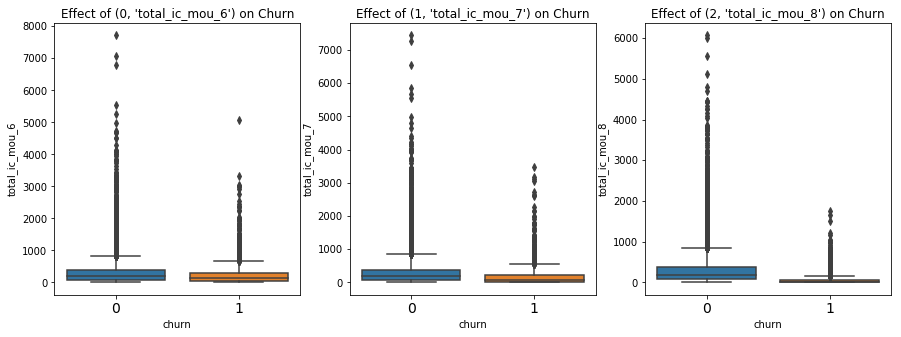

In [93]:
# mean of total outgoing and incoming mou per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean())
print('\n',high_value_data.groupby(['churn'])['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean())

bivariate_plot('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8')
bivariate_plot('total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8')

       og_others_6  og_others_7  og_others_8
churn                                       
0         0.648409     0.031929     0.049943
1         0.804281     0.166833     0.144138

        ic_others_6  ic_others_7  ic_others_8
churn                                       
0         1.175102     1.559204     1.297447
1         0.908976     0.835711     0.400348


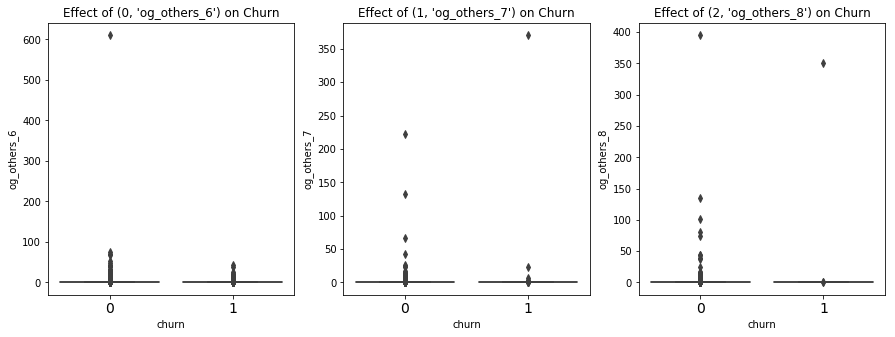

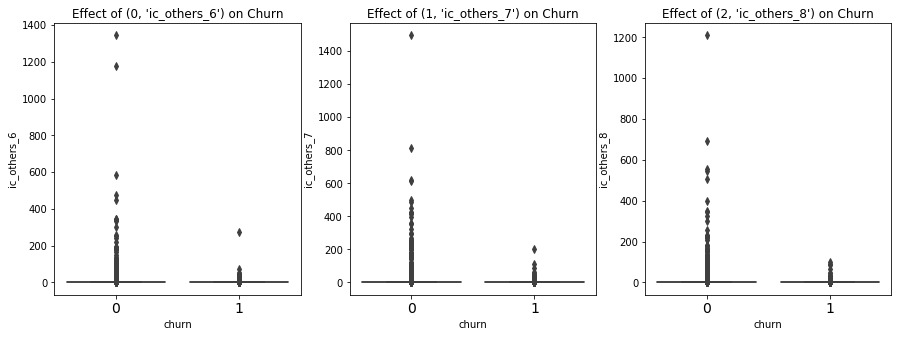

In [94]:
# mean of total outgoing and incoming mou per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['og_others_6', 'og_others_7', 'og_others_8'].mean())
print('\n',high_value_data.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean())

bivariate_plot('og_others_6', 'og_others_7', 'og_others_8')
bivariate_plot('ic_others_6', 'ic_others_7', 'ic_others_8')

No significant insights can be drawn from above plots

### Effect of recharge type monthly or sachet on churn

       monthly_data_6  monthly_data_7  monthly_data_8
churn                                                
0            0.401234        0.429790        0.389877
1            0.290864        0.214666        0.079885

        sachet_data_6  sachet_data_7  sachet_data_8
churn                                             
0           1.275617        1.47188       1.338933
1           1.273658        1.09873       0.335109


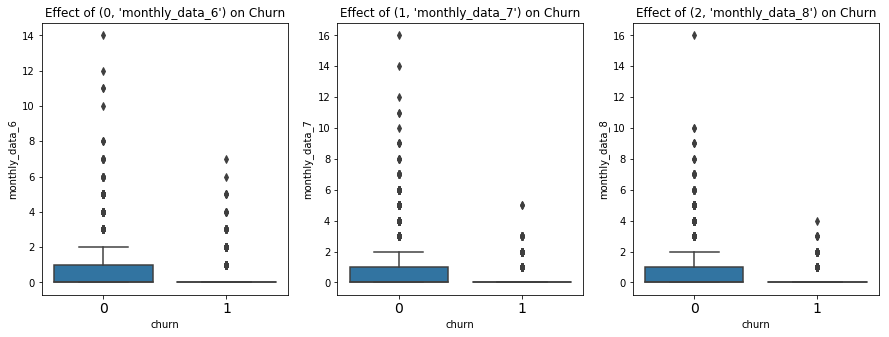

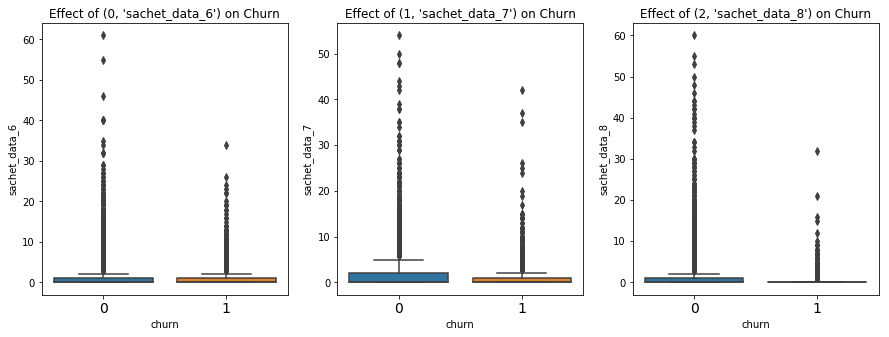

In [95]:
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['monthly_data_6', 'monthly_data_7', 'monthly_data_8'].mean())
print('\n',high_value_data.groupby(['churn'])['sachet_data_6', 'sachet_data_7', 'sachet_data_8'].mean())

bivariate_plot('monthly_data_6', 'monthly_data_7', 'monthly_data_8')
bivariate_plot('sachet_data_6', 'sachet_data_7', 'sachet_data_8')

#### Inference:
Again we can observe there is decrease in monthly and sachet subscription for churned customers in 8th Month.

### Effect of types of call made on churn

Local Calls
       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
churn                                          
0        260.990931    265.637857    252.229627
1        176.057218    136.323040     49.419271

        loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
churn                                          
0        237.047212    243.720165    239.082589
1        164.614203    128.033146     44.673286


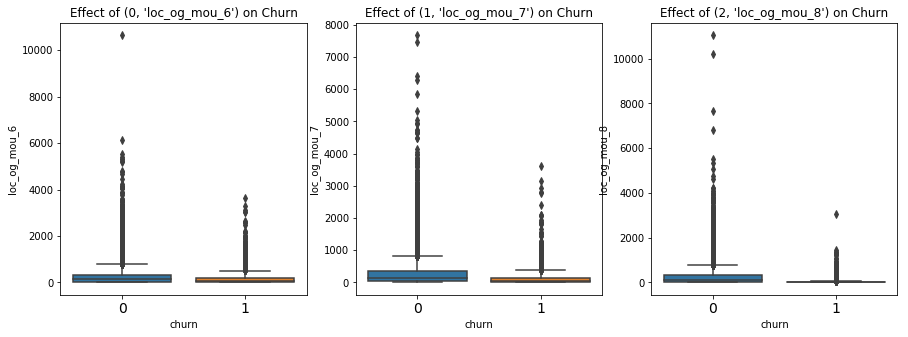

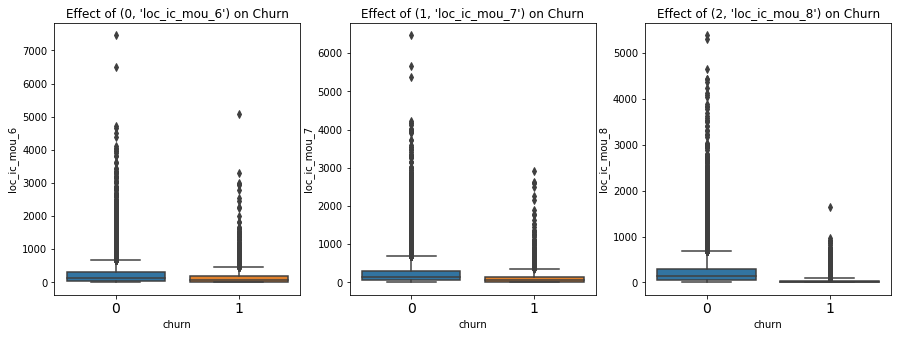

STD Calls
       std_og_mou_6  std_og_mou_7  std_og_mou_8
churn                                          
0        324.436966    353.660138    320.799988
1        603.294965    480.551340    155.853810

        std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
churn                                          
0         46.145362     49.516550     47.055210
1         54.061290     43.734678     14.441794


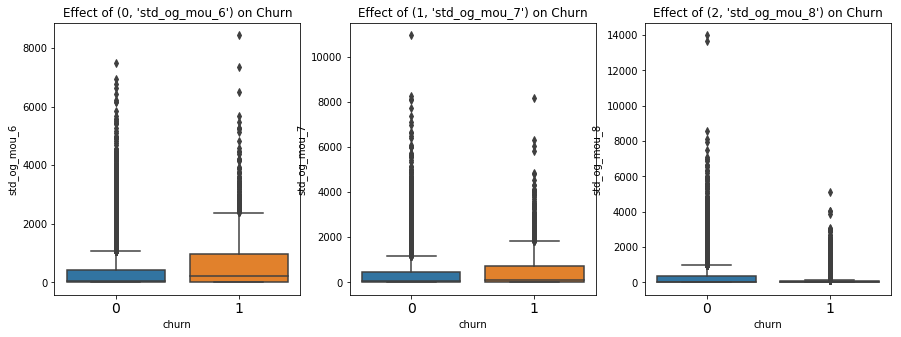

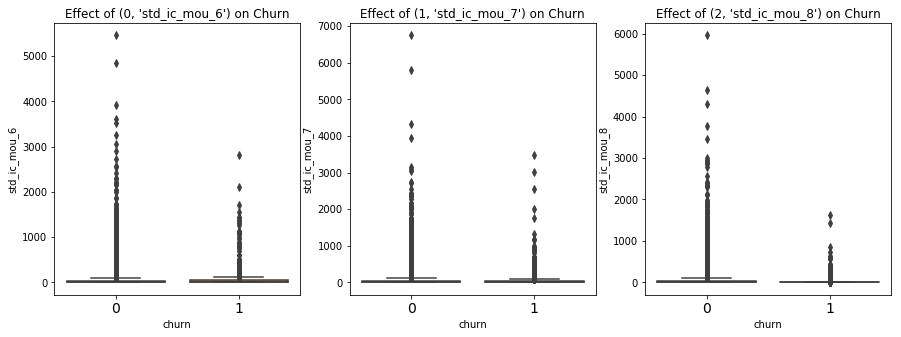

ISD Calls
       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
churn                                          
0          1.979834      2.015143      2.011903
1          4.335809      3.128664      1.238419

        isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8
churn                                          
0         10.694935     12.016992     11.625108
1         11.798058     10.281626      3.920823


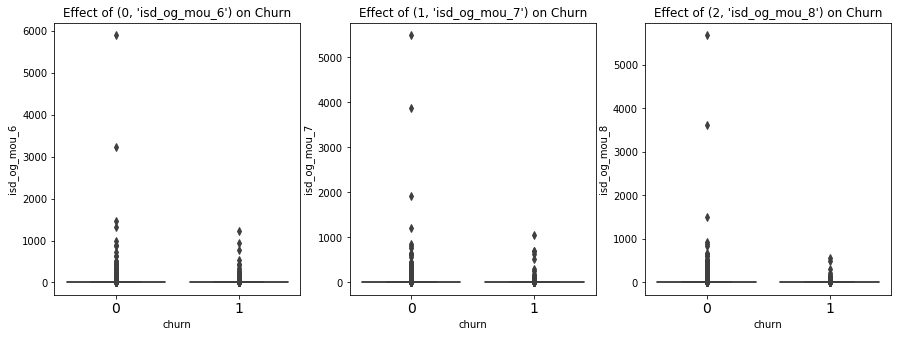

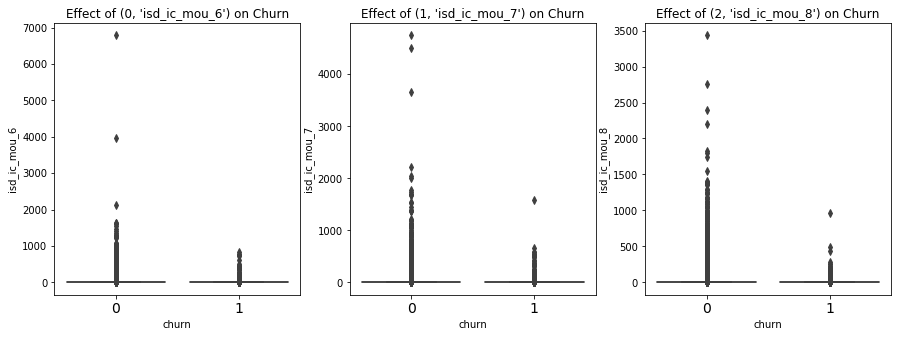

In [96]:
# For local calls
print('Local Calls')
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'].mean())
print('\n',high_value_data.groupby(['churn'])['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'].mean())

bivariate_plot('loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8')
bivariate_plot('loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8')

# For STD calls
print('STD Calls')
print(high_value_data.groupby(['churn'])['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'].mean())
print('\n',high_value_data.groupby(['churn'])['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'].mean())

bivariate_plot('std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8')
bivariate_plot('std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8')

#For ISD calls
print('ISD Calls')
print(high_value_data.groupby(['churn'])['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'].mean())
print('\n',high_value_data.groupby(['churn'])['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8'].mean())
bivariate_plot('isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8')
bivariate_plot('isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8')

#### Inference:
- From above plots, we can see most of the outgoing calls are local calls. STD and ISD calls are very less.
- From the average mou for each month and type of calls, we can see that the Loyal customers tend to use the calling services consistently throughout the good and action phase.
- Byt customers who tend to churn are not using the services efficiently.
- No insights can be drawn from STD incoming calls plot and ISD calls.

Roam Calls
       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
churn                                             
0          24.337114      17.496533      17.760013
1          51.799316      50.134482      43.638824

        roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
churn                                             
0          14.972025      11.108306      11.195356
1          28.962614      29.964297      27.236800


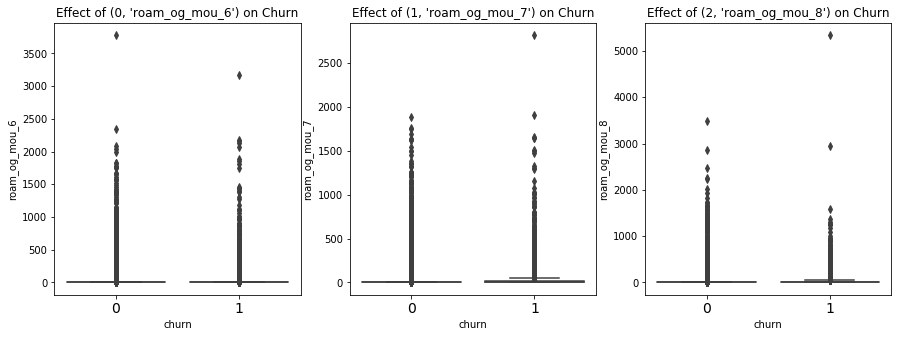

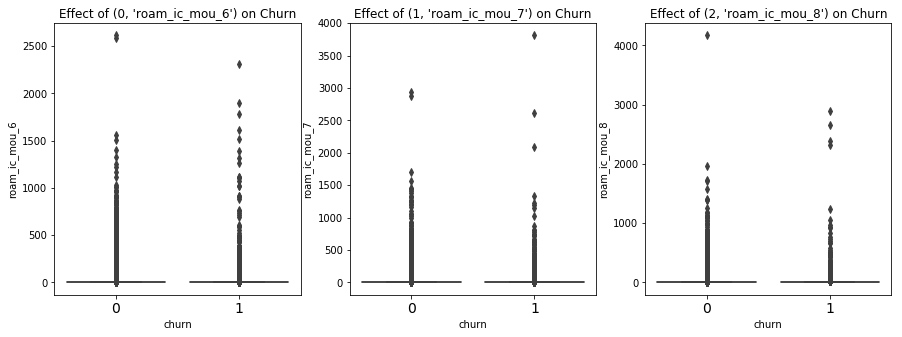

In [97]:
# For local calls
print('Roam Calls')
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean())
print('\n',high_value_data.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean())

bivariate_plot('roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8')
bivariate_plot('roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8')

Data Usage in MB
       vol_data_mb_6  vol_data_mb_7  vol_data_mb_8
churn                                             
0         477.655971     511.777594     488.128121
1         393.156420     309.187050     110.552429


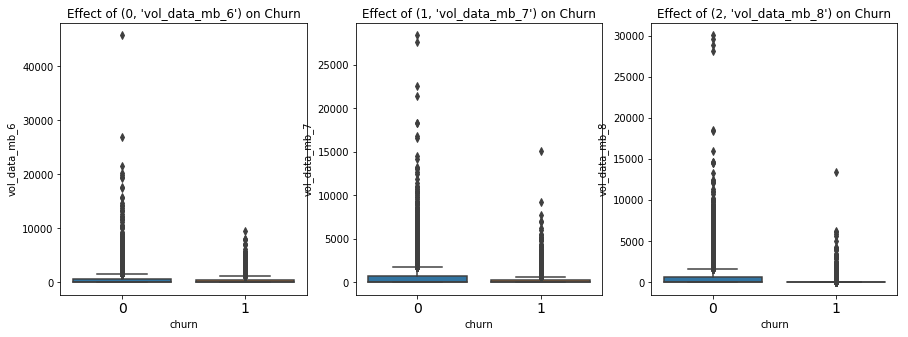

In [98]:
# For data usgae
print('Data Usage in MB')
#mean of total 2G usage per month churn vs Non-Churn
print(high_value_data.groupby(['churn'])['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'].mean())

bivariate_plot('vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8')

#### Inference:
- Data (2G/3G) usage for churned customers decreases in 8th month
- Also, data usage is higher for non-churned customers, we can assume that the churned customers might be from areas where 2G/3G network services are unstable or not available.


##### All the above plots shows that outliers are present in the data, hence outlir treatment is necessary.

### Correlation between numerical columns

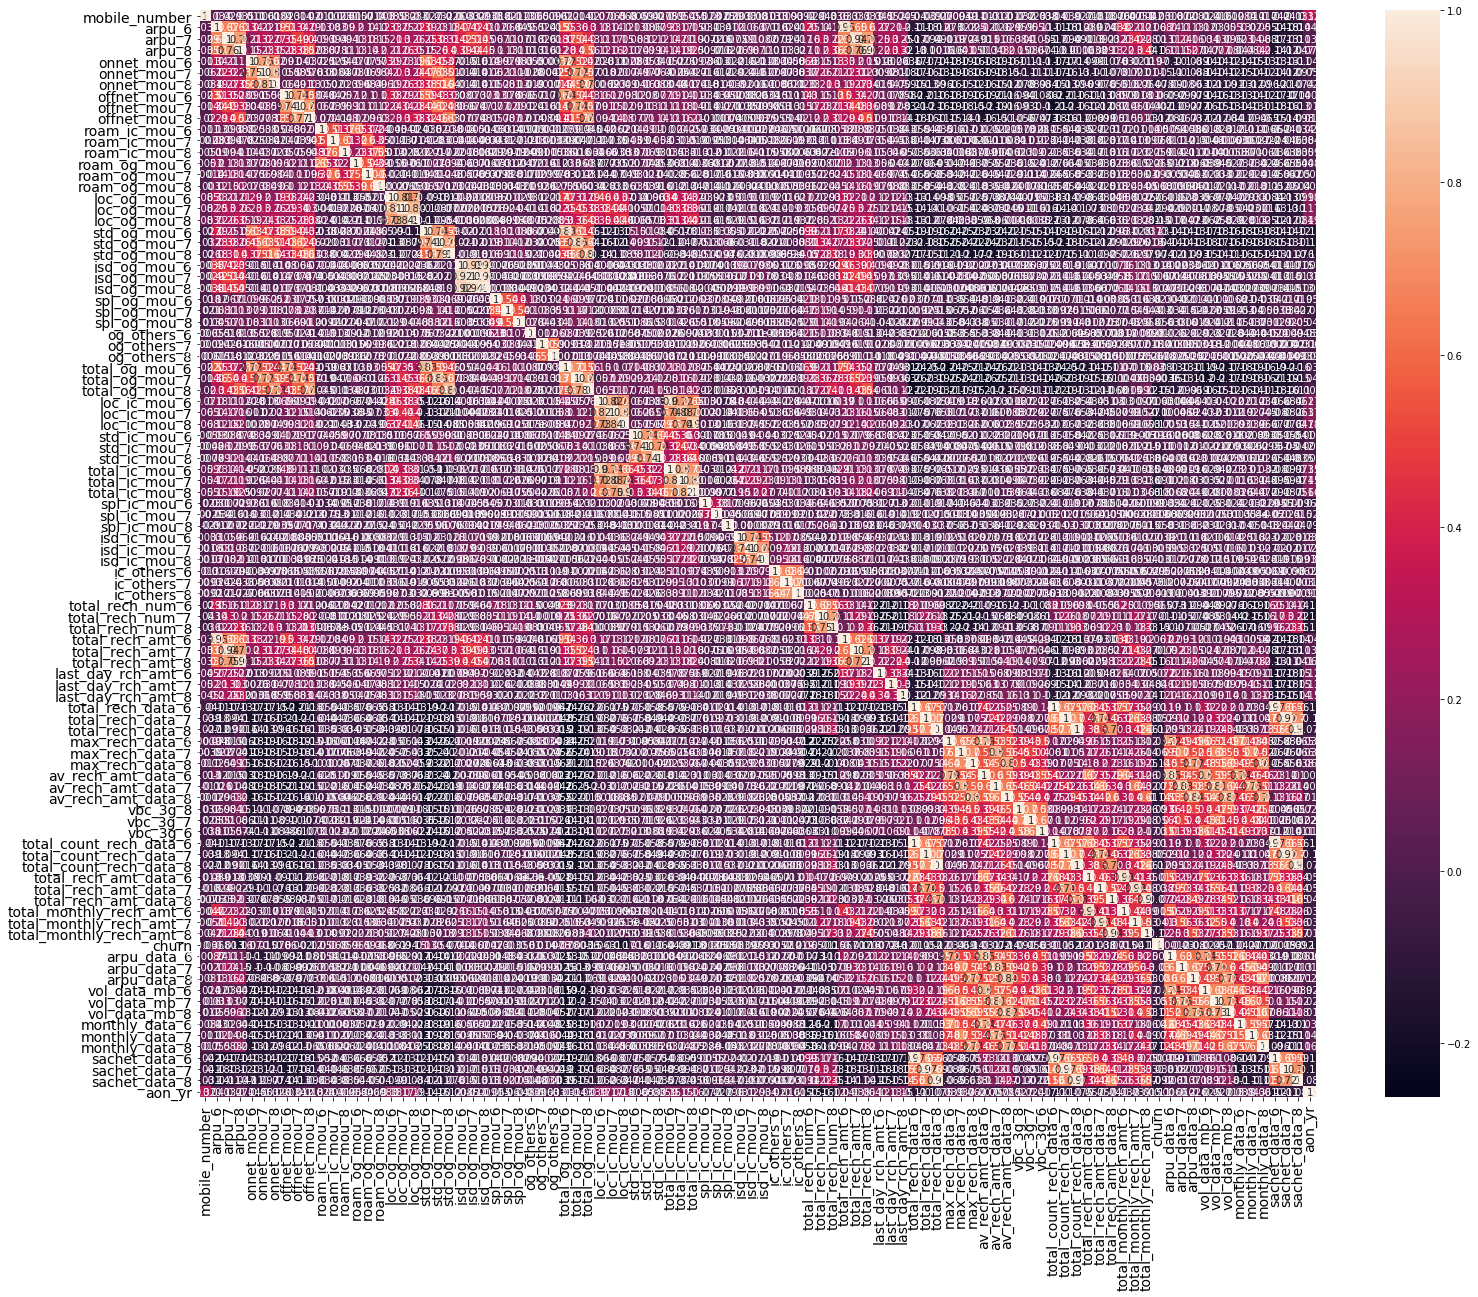

In [99]:
cols = list(high_value_data.dtypes[high_value_data.dtypes !='object'].index)

plt.figure(figsize=(25, 20))
sns.heatmap(high_value_data[cols].corr(), annot = True, annot_kws={'size': 10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [100]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
high_value_corr = high_value_data.corr()
high_value_corr.loc[:,:] = np.tril(high_value_corr, k=-1)
high_value_corr = high_value_corr.stack()
high_value_corr
high_value_corr[(high_value_corr > 0.80) | (high_value_corr < -0.80)].sort_values(ascending=False)

total_count_rech_data_8   total_rech_data_8          1.000000
total_count_rech_data_6   total_rech_data_6          1.000000
total_count_rech_data_7   total_rech_data_7          1.000000
sachet_data_8             total_count_rech_data_8    0.971683
                          total_rech_data_8          0.971683
sachet_data_7             total_count_rech_data_7    0.969595
                          total_rech_data_7          0.969595
sachet_data_6             total_count_rech_data_6    0.967622
                          total_rech_data_6          0.967622
total_rech_amt_8          arpu_8                     0.955351
total_rech_amt_6          arpu_6                     0.946125
total_rech_amt_7          arpu_7                     0.943588
isd_og_mou_8              isd_og_mou_7               0.943120
total_monthly_rech_amt_8  total_rech_amt_data_8      0.941854
total_monthly_rech_amt_7  total_rech_amt_data_7      0.934656
total_monthly_rech_amt_6  total_rech_amt_data_6      0.934058
isd_og_m

#### Note:
- As multicolliniarity will be handled by PCA model, we won't be removing high collinearity columns for now.
- We'll handle the multicollinearity before building interpretable models

### 2.3 Outlier Check for numeric columns

In [101]:
# Checking kurtosis values
kurt_data = high_value_data.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

og_others_6                 16131.064268
og_others_7                 13968.077553
og_others_8                 11031.243861
isd_og_mou_8                10194.147075
isd_og_mou_6                10053.761474
isd_og_mou_7                 8908.322839
spl_ic_mou_7                 7442.614058
ic_others_6                  4773.493147
spl_ic_mou_6                 4073.587763
ic_others_8                  3385.422194
ic_others_7                  3108.386641
isd_ic_mou_6                 2368.615439
total_rech_amt_data_6        1213.690245
total_monthly_rech_amt_6     1051.305695
total_rech_amt_8             1050.764753
isd_ic_mou_7                 1020.387414
arpu_7                       1001.833564
total_rech_amt_7              837.001974
spl_og_mou_7                  770.046135
arpu_8                        760.525695
total_rech_amt_data_8         712.953097
roam_ic_mou_8                 628.773629
total_rech_amt_6              581.302718
total_monthly_rech_amt_8      574.040074
spl_og_mou_6    

In [102]:
# Below 3 columns are showing very high kurtosis value and treating outliers based on these column will remove many of our rows
# Hemce, let's remove these columns before outlier treatment
high_value_data.drop(['og_others_6','og_others_7','og_others_8'],inplace=True,axis=1)

In [103]:
# Checking kurtosis values
kurt_data = high_value_data.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

isd_og_mou_8                10194.147075
isd_og_mou_6                10053.761474
isd_og_mou_7                 8908.322839
spl_ic_mou_7                 7442.614058
ic_others_6                  4773.493147
spl_ic_mou_6                 4073.587763
ic_others_8                  3385.422194
ic_others_7                  3108.386641
isd_ic_mou_6                 2368.615439
total_rech_amt_data_6        1213.690245
total_monthly_rech_amt_6     1051.305695
total_rech_amt_8             1050.764753
isd_ic_mou_7                 1020.387414
arpu_7                       1001.833564
total_rech_amt_7              837.001974
spl_og_mou_7                  770.046135
arpu_8                        760.525695
total_rech_amt_data_8         712.953097
roam_ic_mou_8                 628.773629
total_rech_amt_6              581.302718
total_monthly_rech_amt_8      574.040074
spl_og_mou_6                  534.692316
roam_ic_mou_7                 514.885637
arpu_6                        497.514581
isd_ic_mou_8    

In [104]:
# Storing the variable having high kurtosis value for further treatment
outliers = list(kurt_data[kurt_data > 3].index)
outliers.remove('churn')
print(outliers)
print('Total columns with >3 Kurtosis: ', len(outliers))

['isd_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_ic_mou_7', 'ic_others_6', 'spl_ic_mou_6', 'ic_others_8', 'ic_others_7', 'isd_ic_mou_6', 'total_rech_amt_data_6', 'total_monthly_rech_amt_6', 'total_rech_amt_8', 'isd_ic_mou_7', 'arpu_7', 'total_rech_amt_7', 'spl_og_mou_7', 'arpu_8', 'total_rech_amt_data_8', 'roam_ic_mou_8', 'total_rech_amt_6', 'total_monthly_rech_amt_8', 'spl_og_mou_6', 'roam_ic_mou_7', 'arpu_6', 'isd_ic_mou_8', 'roam_og_mou_8', 'spl_og_mou_8', 'spl_ic_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_6', 'vol_data_mb_6', 'roam_ic_mou_6', 'total_rech_amt_data_7', 'total_monthly_rech_amt_7', 'last_day_rch_amt_8', 'roam_og_mou_6', 'vol_data_mb_8', 'arpu_data_6', 'roam_og_mou_7', 'av_rech_amt_data_6', 'vol_data_mb_7', 'last_day_rch_amt_6', 'night_pck_user_8', 'night_pck_user_7', 'loc_og_mou_8', 'last_day_rch_amt_7', 'night_pck_user_6', 'arpu_data_7', 'offnet_mou_8', 'vbc_3g_8', 'vbc_3g_6', 'arpu_data_8', 'onnet_mou_8', 'total_rech_num_6', 'loc_og_mou_6', 'vbc_3g_7', 

- Most rows will be removed as part of the outlier treatment if we go for 5 percentile removal from both ends.Hence, will just remove the 2 percentile.
- Since there are a lot of variables present in the dataset, PCA will be used to reduce the dimensions and handle the multicolliniarity while not losing a lot of information

In [105]:
#Outlier Treatment using IQR

for column in outliers:
    Q1 = high_value_data[column].quantile(.02)
    Q3 = high_value_data[column].quantile(.98)
    IQR = Q3 - Q1
    high_value_data = high_value_data[(high_value_data[column] >= Q1 - 1.5*IQR) & (high_value_data[column] <= Q3 + 1.5*IQR)]
    print('Treated column: ',column, 'Shape: ',high_value_data.shape)

Treated column:  isd_og_mou_8 Shape:  (29600, 99)
Treated column:  isd_og_mou_6 Shape:  (29260, 99)
Treated column:  isd_og_mou_7 Shape:  (28929, 99)
Treated column:  spl_ic_mou_7 Shape:  (28887, 99)
Treated column:  ic_others_6 Shape:  (28684, 99)
Treated column:  spl_ic_mou_6 Shape:  (28680, 99)
Treated column:  ic_others_8 Shape:  (28504, 99)
Treated column:  ic_others_7 Shape:  (28346, 99)
Treated column:  isd_ic_mou_6 Shape:  (28143, 99)
Treated column:  total_rech_amt_data_6 Shape:  (28043, 99)
Treated column:  total_monthly_rech_amt_6 Shape:  (28039, 99)
Treated column:  total_rech_amt_8 Shape:  (28028, 99)
Treated column:  isd_ic_mou_7 Shape:  (27897, 99)
Treated column:  arpu_7 Shape:  (27891, 99)
Treated column:  total_rech_amt_7 Shape:  (27890, 99)
Treated column:  spl_og_mou_7 Shape:  (27802, 99)
Treated column:  arpu_8 Shape:  (27800, 99)
Treated column:  total_rech_amt_data_8 Shape:  (27715, 99)
Treated column:  roam_ic_mou_8 Shape:  (27564, 99)
Treated column:  total_rec

In [106]:
# Also lets drop mobile_number column
# creating an index column with the mobile number as its value
hvc_index = high_value_data.pop('mobile_number')
#high_value_data.drop('mobile_number',inplace=True,axis=1)
hvc_index.head()

0     7000842753
7     7000701601
8     7001524846
21    7002124215
23    7000887461
Name: mobile_number, dtype: int64

In [107]:
high_value_data.shape

(25176, 98)

## Step 4: Data Modelling

### 4.1 Test Train Split

In [108]:
#lets import train test split 
from sklearn.model_selection import train_test_split

X = high_value_data.drop(['churn'], axis=1)
y = high_value_data['churn']    
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4.2 Feature Scaling

In [109]:
# Importing MinMaxScaler from sklearn library

from sklearn.preprocessing import MinMaxScaler

# Creating instance of class
scaler = MinMaxScaler()

In [110]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = list(X.dtypes[X.dtypes !='object'].index)

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1065   0.416047  0.428416  0.280373     0.002965     0.030939     0.027641   
65116  0.532211  0.492889  0.378510     0.248221     0.191896     0.178171   
33196  0.417193  0.397438  0.225986     0.053664     0.036394     0.038114   
73324  0.820349  0.602375  0.464912     0.122001     0.059548     0.030550   
15689  0.321306  0.289676  0.154684     0.004379     0.003086     0.001374   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
1065       0.307740      0.241903      0.332200            0.0            0.0   
65116      0.280715      0.230412      0.283193            0.0            0.0   
33196      0.133764      0.163424      0.144367            0.0            0.0   
73324      0.488221      0.343860      0.393212            0.0            0.0   
15689      0.036585      0.025637      0.025194            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
1065             0.0            0.0            0.0            0.0   
65116            0.0            0.0            0.0            0.0   
33196            0.0            0.0            0.0            0.0   
73324            0.0            0.0            0.0            0.0   
15689            0.0            0.0            0.0            0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
1065       0.005225      0.002056      0.006337      0.250414      0.237644   
65116      0.203483      0.180468      0.192848      0.288415      0.248911   
33196      0.069608      0.069571      0.061101      0.105758      0.129456   
73324      0.679071      0.403058      0.404395      0.054903      0.088402   
15689      0.049814      0.033153      0.035174      0.000041      0.000000   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
1065       0.301268           0.0           0.0           0.0      0.050519   
65116      0.261650           0.0           0.0           0.0      0.000000   
33196      0.115140           0.0           0.0           0.0      0.000571   
73324      0.100397           0.0           0.0           0.0      0.006755   
15689      0.000000           0.0           0.0           0.0      0.054705   

       spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  \
1065       0.022424      0.075623        0.244811        0.235900   
65116      0.000000      0.073862        0.402794        0.361764   
33196      0.000000      0.000000        0.144608        0.172443   
73324      0.061704      0.038560        0.473976        0.349303   
15689      0.128365      0.000000        0.032009        0.024840   

       total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  \
1065         0.298899      0.023982      0.016660      0.004611      0.022853   
65116        0.377155      0.158582      0.122659      0.091290      0.032033   
33196        0.150338      0.061130      0.057297      0.111618      0.085634   
73324        0.351954      0.646528      0.857077      0.732606      0.221339   
15689        0.022037      0.558220      0.262164      0.544021      0.000000   

       std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
1065       0.052603      0.033787        0.057878        0.047130   
65116      0.028271      0.034421        0.170565        0.132791   
33196      0.332246      0.302310        0.082936        0.163722   
73324      0.054239      0.054862        0.702663        0.868922   
15689      0.000000      0.000000        0.557959        0.260454   

       total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
1065         0.049150      0.548872           0.0      0.617391      0.434902   
65116        0.099606      0.436090           0.0      0.217391      0.058456   
33196        0.193290      0.000000           0.0      0.000000      0.000000   
73324        0.737271      0.000000           0

In [111]:
# Applying scaler() to all numeric columns of test data set

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
35502  0.413704  0.376825  0.179212     0.386411     0.261419     0.080294   
27295  0.634741  0.695741  0.463299     0.584496     0.460764     0.716547   
9431   0.375362  0.391498  0.285966     0.037177     0.034500     0.040434   
35790  0.272354  0.358383  0.253908     0.072728     0.041647     0.046772   
77184  0.255887  0.247037  0.098204     0.000000     0.000098     0.000126   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
35502      0.096648      0.079847      0.039209       0.000000       0.000000   
27295      0.343104      0.620277      0.278838       0.000000       0.000000   
9431       0.058666      0.048902      0.059561       0.000000       0.079993   
35790      0.018944      0.070632      0.107690       0.045532       0.093087   
77184      0.000000      0.001801      0.000612       0.000000       0.000000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
35502       0.368737       0.000000       0.000000       0.168142   
27295       0.000000       0.000000       0.000000       0.000000   
9431        0.000000       0.000000       0.073284       0.000000   
35790       0.099799       0.037745       0.297112       0.330061   
77184       0.000000       0.000000       0.000000       0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
35502      0.493053      0.096479      0.082990      0.054238      0.231039   
27295      0.019220      0.019643      0.027128      0.715533      0.926668   
9431       0.096717      0.081680      0.092208      0.006664      0.012495   
35790      0.013901      0.039556      0.071501      0.056655      0.045565   
77184      0.000000      0.000191      0.000973      0.000000      0.000000   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
35502      0.027116           0.0           0.0           0.0      0.138997   
27295      0.806395           0.0           0.0           0.0      0.007992   
9431       0.024567           0.0           0.0           0.0      0.356579   
35790      0.048404           0.0           0.0           0.0      0.074303   
77184      0.000000           0.0           0.0           0.0      0.000000   

       spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  \
35502      0.000000      0.036887        0.360614        0.289858   
27295      0.065060      0.005370        0.698382        0.926781   
9431       0.000000      0.010212        0.073414        0.065118   
35790      0.008009      0.056607        0.064434        0.070651   
77184      0.057433      0.003786        0.000040        0.001645   

       total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  \
35502        0.079232      0.307490      0.210437      0.097294      0.108939   
27295        0.801909      0.020991      0.013628      0.019593      0.127512   
9431         0.081914      0.087043      0.105999      0.129071      0.012161   
35790        0.093199      0.020314      0.027316      0.032408      0.044110   
77184        0.000696      0.056770      0.041004      0.030330      0.027937   

       std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
35502      0.037585      0.029697        0.335123        0.221145   
27295      0.049097      0.004904        0.054014        0.036225   
9431       0.003202      0.037438        0.090103        0.106341   
35790      0.022006      0.084613        0.031552        0.034215   
77184      0.000362      0.004187        0.063867        0.040856   

       total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
35502        0.104090           0.0           0.0      0.000000      0.000000   
27295        0.035937           0.0           0.0      0.434783      0.008187   
9431         0.137542           0.0           0.0      0.000000      0.000000   
35790        0.055251           0.0           0

### 4.3 Handling Class Imbalance using sampling Technique (SMOTE)

In [112]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [113]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1350
counts of label '0': 16273


In [114]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [115]:
#lets print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 16273
counts of label '0': 16273


In [116]:
print("Dimension of X_train_sm Shape:", X_train_smo.shape)
print("Dimension of y_train_sm Shape:", y_train_smo.shape)

Dimension of X_train_sm Shape: (32546, 97)
Dimension of y_train_sm Shape: (32546,)


In [117]:
# Converting binary variables to int datatype
X_train_smo[cat_col] = X_train_smo[cat_col].astype('int64')
X_test[cat_col] = X_test[cat_col].astype('int64')

## Step 5: Model Building

## 5.1 Part 1: Predictive Model Using Dimensionality Reduction Technique PCA

### 5.1.1 Deriving PCA coponents

In [118]:
# Import library to perform PCA
from sklearn.decomposition import PCA

In [119]:
# Creating instance of class
pca = PCA(random_state=42)

In [120]:
#lets perform PCA on sampled data (fit PCA on the train dataset)
pca.fit(X_train_smo)

PCA(random_state=42)

In [121]:
# Checking the PCA components
pca.components_

array([[-3.91612662e-02, -2.54981900e-02, -3.77522192e-04, ...,
         5.72608989e-02,  4.15702675e-02,  1.29780762e-02],
       [ 3.58225093e-02,  1.01241258e-01,  1.28669617e-01, ...,
        -1.47310306e-02,  4.40226471e-02,  1.04856495e-01],
       [ 1.02708630e-01,  3.61573601e-02,  7.55676482e-02, ...,
        -1.91703785e-01, -9.54769002e-02,  1.66499295e-01],
       ...,
       [-0.00000000e+00, -2.50532275e-17, -1.82473489e-16, ...,
         3.55903253e-02, -1.48729353e-01, -3.79292908e-18],
       [-0.00000000e+00, -1.44906062e-17, -8.47565705e-17, ...,
         4.45515892e-02, -5.46683301e-02,  3.67407752e-18],
       [-0.00000000e+00,  1.69201498e-17, -1.74945747e-17, ...,
        -5.26017767e-04, -9.36709389e-05, -8.02951782e-20]])

In [122]:
pca.explained_variance_ratio_

array([4.12242586e-01, 9.77699340e-02, 6.44382886e-02, 5.43522443e-02,
       4.89389269e-02, 3.71682321e-02, 2.41817928e-02, 2.15749844e-02,
       2.00792588e-02, 1.52478225e-02, 1.38834458e-02, 1.21152027e-02,
       1.06271014e-02, 9.65781777e-03, 9.59053164e-03, 9.29381908e-03,
       7.87262337e-03, 7.26779020e-03, 6.77127917e-03, 6.41243247e-03,
       6.29515801e-03, 6.14582400e-03, 5.89456914e-03, 5.79545740e-03,
       5.17882259e-03, 4.27765549e-03, 3.98401771e-03, 3.79005487e-03,
       3.69561735e-03, 3.57306631e-03, 3.23827632e-03, 3.19360992e-03,
       3.10680962e-03, 2.93556600e-03, 2.69479819e-03, 2.62102532e-03,
       2.41642707e-03, 2.29765632e-03, 2.24502408e-03, 2.00807973e-03,
       1.96119762e-03, 1.84536940e-03, 1.79922038e-03, 1.75386392e-03,
       1.73270859e-03, 1.62831843e-03, 1.58914747e-03, 1.51502616e-03,
       1.49886470e-03, 1.44344939e-03, 1.36145191e-03, 1.29742286e-03,
       1.20777312e-03, 1.12230609e-03, 1.11964961e-03, 1.06018537e-03,
      

In [123]:
# Storing cumulative variance in np array
var_cumu = np.cumsum(pca.explained_variance_ratio_)

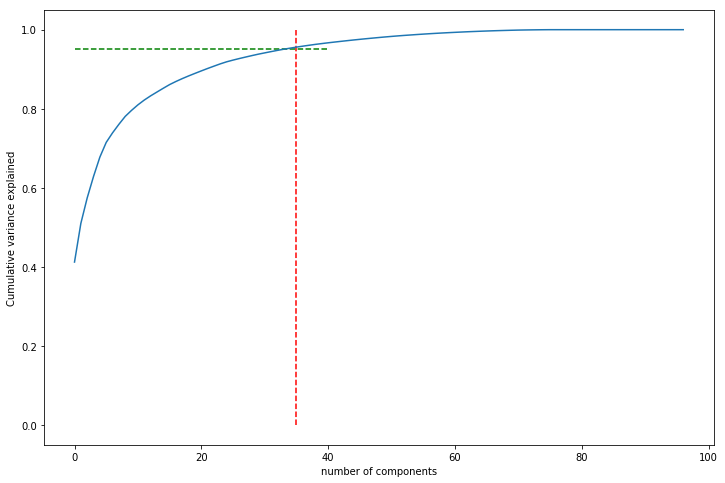

In [124]:
#lets draw screeplot in between cumulative variance and number of components

fig = plt.figure(figsize=[12,8])
plt.vlines(x=35, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

### Plot shows that 35 components are enough to explain close to 95% variance

In [125]:
#lets perform incremental PCA for efficiency using 15 components

from sklearn.decomposition import IncrementalPCA

In [126]:
# Creating class instance
pca_final = IncrementalPCA(n_components=35)

In [127]:
# Fit on sampled train data
X_train_pca = pca_final.fit_transform(X_train_smo)

In [128]:
X_train_pca.shape

(32546, 35)

In [129]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(35, 35)

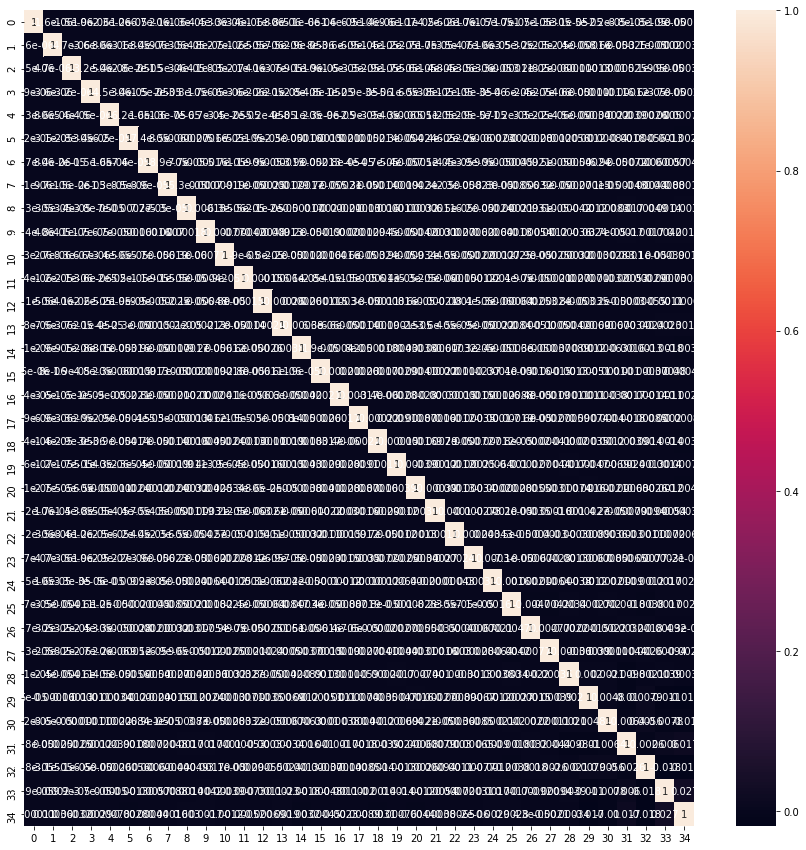

In [130]:
# Plotting heatmap to oserve the correlation between features
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### We can observe that the correlations are close to 0.

In [131]:
#Applying PCA with selected components to the test data - 35 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(7553, 35)

In [132]:
# Checking the metrics and storing them in a dataframe for further comparison
metric_data = pd.DataFrame()

In [133]:
# Creating a function to calculate evaluation metrics for models
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

def calculate_metrics_train(model, actual, predict):
    # Confusion matrix 
    confusion = metrics.confusion_matrix(actual, predict)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # AUC, ROC score
    auc_score = metrics.roc_auc_score(actual, predict)
    print('AUC-ROC Score: ',auc_score)
    metric_data.loc["AUC-ROC Score", model] = round(100*auc_score, 3)

    # Let's check the overall accuracy.
    acc = metrics.accuracy_score(actual, predict)
    print('Accuracy: ',metrics.accuracy_score(actual, predict))
    metric_data.loc["Accuracy",model] = round(100*acc, 3)

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity: ',TP / float(TP+FN))
    metric_data.loc["Sensitivity", model] = round(100*(TP / float(TP+FN)), 3)

    #Calculating recall score
    re = recall_score(actual, predict)
    print('Recall score: ',recall_score(actual, predict))
    metric_data.loc["Recall score", model] = round(100*re, 3)

    #Checking precision
    pre = precision_score(actual, predict)
    print('Precision Score: ',precision_score(actual, predict))
    metric_data.loc["Precision Score", model] = round(100*pre, 3)

    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))
    metric_data.loc["Specificity", model] = round(100*(TN / float(TN+FP)), 3)

    # Calculate false postive rate - predicting converted when customer have not converted
    print('False positive Rate: ',FP/ float(TN+FP))

    # positive predictive value 
    print('Positive Predictive value: ',TP / float(TP+FP))

    # Negative predictive value
    print('Negative Predictive value: ',TN / float(TN+ FN))

## 5.1.2 Logistic regression on PCA components to make predictions

In [1]:
# Importing libraries
from sklearn.linear_model import LogisticRegression

In [135]:
# Creating ab instance of class for regression model

learner_pca = LogisticRegression(class_weight='balanced')

In [136]:
# Fit
model_pca = learner_pca.fit(X_train_pca, y_train_smo)

In [137]:
#Predict on training set
dtrain_predictions = learner_pca.predict(X_train_pca)
dtrain_predprob = learner_pca.predict_proba(X_train_pca)[:,1]

In [138]:
#lets print some scores
from sklearn import metrics

print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

calculate_metrics_train('Logistic_Basic_Train', y_train_smo, dtrain_predictions)

Accuracy : 0.8373686474528359
Recall/Sensitivity : 0.8423769434031831
AUC Score (Train): 0.9087657915595947
[[13545  2728]
 [ 2565 13708]]
AUC-ROC Score:  0.8373686474528359
Accuracy:  0.837368647452836
Sensitivity:  0.8423769434031831
Recall score:  0.8423769434031831
Precision Score:  0.8340228766123144
Specificity:  0.8323603515024888
False positive Rate:  0.1676396484975112
Positive Predictive value:  0.8340228766123144
Negative Predictive value:  0.840782122905028


In [139]:
#Making predictions on the test set
y_test_pred = model_pca.predict(X_test_pca)
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [140]:
# Checking the predicted probabilities
pred_probs_test

array([[0.42077902, 0.57922098],
       [0.99558896, 0.00441104],
       [0.9921667 , 0.0078333 ],
       ...,
       [0.14849568, 0.85150432],
       [0.95605241, 0.04394759],
       [0.64258211, 0.35741789]])

In [141]:
# Checking the predictions
y_test_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [142]:
# Importing libraries for evaluation metrics calculations
from sklearn import metrics

In [143]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[5771 1203]
 [ 112  467]]


In [144]:
# Storing values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Metrics on test data
print('Accuracy(Test):',metrics.roc_auc_score(y_test, y_test_pred))
print('Sensitivity/Recall(Test):',metrics.recall_score(y_test, y_test_pred))
calculate_metrics_train('Logistic_Basic_Test', y_test, y_test_pred)

Accuracy(Test): 0.8170325952848305
Sensitivity/Recall(Test): 0.8065630397236615
[[5771 1203]
 [ 112  467]]
AUC-ROC Score:  0.8170325952848305
Accuracy:  0.8258969945716934
Sensitivity:  0.8065630397236615
Recall score:  0.8065630397236615
Precision Score:  0.27964071856287426
Specificity:  0.8275021508459994
False positive Rate:  0.17249784915400057
Positive Predictive value:  0.27964071856287426
Negative Predictive value:  0.9809620941696413


### 5.1.3 Logistic regression on PCA components (with probability cutoff calculation)

In [146]:
#lets check with probability cutoff 0.5
y_train_pred = learner_pca.predict_proba(X_train_pca)[:,1]

y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})

y_train_pred_final['Churn_Prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.000079          0
1      0    0.004243          0
2      0    0.161348          0
3      0    0.000612          0
4      0    0.014377          0

In [147]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

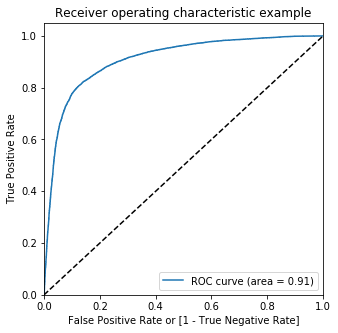

In [149]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000079          0    1    0    0    0    0    0    0    0    0   
1      0    0.004243          0    1    0    0    0    0    0    0    0    0   
2      0    0.161348          0    1    1    0    0    0    0    0    0    0   
3      0    0.000612          0    1    0    0    0    0    0    0    0    0   
4      0    0.014377          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [151]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.690592  0.977755  0.403429
0.2   0.2  0.760093  0.950716  0.569471
0.3   0.3  0.800897  0.921404  0.680391
0.4   0.4  0.826369  0.885086  0.767652
0.5   0.5  0.837369  0.842377  0.832360
0.6   0.6  0.840718  0.797333  0.884103
0.7   0.7  0.825908  0.729798  0.922018
0.8   0.8  0.788883  0.627788  0.949978
0.9   0.9  0.656394  0.332330  0.980458


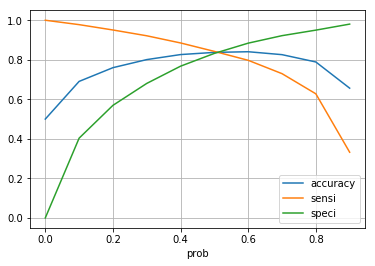

In [152]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets look into it more finely.

In [153]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000079          0    1    0    0    0    0    0    0    0    0   
1      0    0.004243          0    1    0    0    0    0    0    0    0    0   
2      0    0.161348          0    1    1    0    0    0    0    0    0    0   
3      0    0.000612          0    1    0    0    0    0    0    0    0    0   
4      0    0.014377          0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0     0     0     0     0     0     0     0     0     0  
1    0     0     0     0     0     0     0     0     0     0  
2    0     0     0     0     0     0     0     0     0     0  
3    0     0     0     0     0     0     0     0     0     0  
4    0     0     0     0     0     0     0     0     0     0

In [154]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.837369  0.842377  0.832360
0.51  0.51  0.837584  0.837707  0.837461
0.52  0.52  0.838598  0.833651  0.843545
0.53  0.53  0.839212  0.829288  0.849137
0.54  0.54  0.840226  0.825908  0.854544
0.55  0.55  0.841240  0.821668  0.860812
0.56  0.56  0.840871  0.816322  0.865421
0.57  0.57  0.841025  0.811282  0.870768
0.58  0.58  0.841302  0.806735  0.875868
0.59  0.59  0.841179  0.802126  0.880231


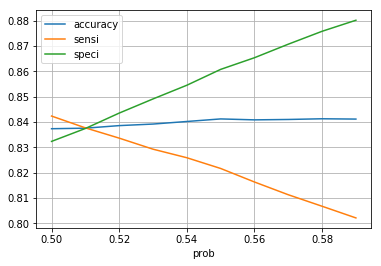

In [155]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

### From the curve above, 0.51 is the optimum point to take it as a cutoff probability.

In [156]:
# Apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000079          0    1    0    0    0    0    0    0    0    0   
1      0    0.004243          0    1    0    0    0    0    0    0    0    0   
2      0    0.161348          0    1    1    0    0    0    0    0    0    0   
3      0    0.000612          0    1    0    0    0    0    0    0    0    0   
4      0    0.014377          0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  final_predicted  
0    0     0     0     0     0     0     0     0     0     0                0  
1    0     0     0     0     0     0     0     0     0     0                0  
2    0     0     0     0     0     0     0     0     0     0                0  
3    0     0     0     0     0     0     0     0     0     0                0  
4    0     0     0     0     0     0     0     0     0     0                0

In [157]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = learner_pca.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.51 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.000079          0
1      0    0.004243          0
2      0    0.161348          0
3      0    0.000612          0
4      0    0.014377          0

- Accuracy is a measure of the number of cases(both "churned" and "not churned") rightly predicted by the model. 
- Sensitivity is a measure of the number of "churned" cases rightly predicted by the model.
- Specificity is a measure of how precisely the model is able to predict the number of "churned" cases.

Therefore, Sensitivity/Recall is the most important metric in this case study. 
- Thus our goal is maximize the sensitivity while ensuring accuracy and specificity are not changing drastically.

In [158]:
calculate_metrics_train('Logistic_Train_0.51', y_train_pred_final.Churn, y_train_pred_final.predicted)

[[13628  2645]
 [ 2641 13632]]
AUC-ROC Score:  0.8375837276470227
Accuracy:  0.8375837276470227
Sensitivity:  0.8377066306151294
Recall score:  0.8377066306151294
Precision Score:  0.8375007679547828
Specificity:  0.837460824678916
False positive Rate:  0.162539175321084
Positive Predictive value:  0.8375007679547828
Negative Predictive value:  0.8376667281332596


In [159]:
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  
AUC-ROC Score                 83.758  
Accuracy                      83.758  
Sensitivity                   83.771  
Recall score                  83.771  
Precision Score               83.750  
Specificity                   83.746

#### Inference - The Logistic Regression model performs well on the train data with Accuracy of 83.7% and Sensitivity of 83.7%

In [160]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_pca.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.51 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
35502      0    0.579221          1
27295      0    0.004411          0
9431       0    0.007833          0
35790      0    0.287635          0
77184      0    0.699698          1

In [161]:
calculate_metrics_train('Logistic_Test_0.51', y_test_pred_final.Churn, y_test_pred_final.predicted)

[[5819 1155]
 [ 116  463]]
AUC-ROC Score:  0.8170197174504068
Accuracy:  0.8317224943730968
Sensitivity:  0.7996545768566494
Recall score:  0.7996545768566494
Precision Score:  0.2861557478368356
Specificity:  0.8343848580441641
False positive Rate:  0.16561514195583596
Positive Predictive value:  0.2861557478368356
Negative Predictive value:  0.9804549283909014


In [162]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  
AUC-ROC Score                 83.758              81.702  
Accuracy                      83.758              83.172  
Sensitivity                   83.771              79.965  
Recall score                  83.771              79.965  
Precision Score               83.750              28.616  
Specificity                   83.746              83.438

#### Inference 
- The accuracy and specificity values for train and test are much better and stable for logistic regression.
- The sensitivity score on test set is lower then the train set but it's still within 5% range.

- Conclusion - The Logistic Regression does a decent job in both train and test data predictions.

- Let's check the performance of tree based models for churn predictions

## 5.1.4 Decision Tree model on PCA components to make predictions

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [164]:
# Fitting the decision tree with default parameter

dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train_pca, y_train_smo)

DecisionTreeClassifier(random_state=42)

In [165]:
# Making predictions
y_train_pred = dt_base.predict(X_train_pca)
y_test_pred = dt_base.predict(X_test_pca)

In [166]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6974
           1       0.23      0.48      0.31       579

    accuracy                           0.84      7553
   macro avg       0.59      0.68      0.61      7553
weighted avg       0.90      0.84      0.86      7553



In [167]:
calculate_metrics_train('DT_Basic_Train', y_train_smo, y_train_pred)

[[16273     0]
 [    0 16273]]
AUC-ROC Score:  1.0
Accuracy:  1.0
Sensitivity:  1.0
Recall score:  1.0
Precision Score:  1.0
Specificity:  1.0
False positive Rate:  0.0
Positive Predictive value:  1.0
Negative Predictive value:  1.0


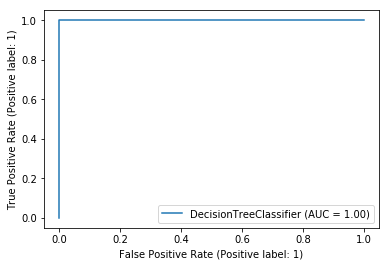

In [168]:
# Plot the ROC curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_base, X_train_pca, y_train_smo, drop_intermediate=False)
plt.show()

In [169]:
calculate_metrics_train('DT_Basic_Test', y_test, y_test_pred)

[[6056  918]
 [ 300  279]]
AUC-ROC Score:  0.6751167549045975
Accuracy:  0.8387395736793327
Sensitivity:  0.48186528497409326
Recall score:  0.48186528497409326
Precision Score:  0.23308270676691728
Specificity:  0.8683682248351018
False positive Rate:  0.13163177516489818
Positive Predictive value:  0.23308270676691728
Negative Predictive value:  0.9528005034612964


In [170]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  
AUC-ROC Score           67.512  
Accuracy                83.874  
Sensitivity             48.187  
Recall score            48.187  
Precision Score         23.308  
Specificity             86.837

#### Inference:
- As we can see decision tree model with defailt parameters was overfitted on training data.
- There is significant decrease in accuracy, sensitivity and specificity of test dataset as compared to training data.
- Let's tune some parameters to get better results


### Hyper-parameter tuning for the Decision Tree

In [171]:
dt = DecisionTreeClassifier(random_state=42)

In [172]:
# Create the parameter grid 
params = {
    'max_depth': [5, 7, 10, 15, 20],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"],
    'max_leaf_nodes': [15, 20, 25, 30, 40]
}

In [173]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [174]:
%%time
grid_search.fit(X_train_pca, y_train_smo)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Wall time: 7min 34s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15, 20],
                         'max_leaf_nodes': [15, 20, 25, 30, 40],
                         'min_samples_leaf': [10, 20, 50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [175]:
grid_search.best_score_

0.8753828104897032

In [176]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=40,
                       min_samples_leaf=20, random_state=42)

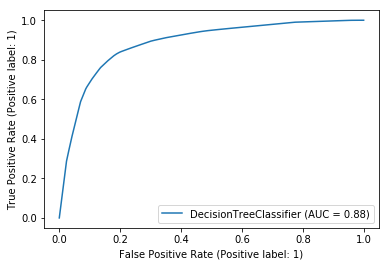

In [177]:
plot_roc_curve(dt_best, X_train_pca, y_train_smo)
plt.show()

In [178]:
# Making predictions
y_train_pred = dt_best.predict(X_train_pca)
y_test_pred = dt_best.predict(X_test_pca)

In [179]:
from sklearn.metrics import classification_report

In [180]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      6974
           1       0.24      0.75      0.36       579

    accuracy                           0.80      7553
   macro avg       0.61      0.78      0.62      7553
weighted avg       0.92      0.80      0.84      7553



In [181]:
calculate_metrics_train('DT_Best_Train_1', y_train_smo, y_train_pred)

[[13211  3062]
 [ 2770 13503]]
AUC-ROC Score:  0.8208074725004608
Accuracy:  0.8208074725004609
Sensitivity:  0.8297793891722485
Recall score:  0.8297793891722485
Precision Score:  0.8151524298219137
Specificity:  0.8118355558286733
False positive Rate:  0.18816444417132674
Positive Predictive value:  0.8151524298219137
Negative Predictive value:  0.8266691696389462


In [182]:
calculate_metrics_train('DT_Best_Test_1', y_test, y_test_pred)

[[5599 1375]
 [ 146  433]]
AUC-ROC Score:  0.7753401110366508
Accuracy:  0.7986230636833046
Sensitivity:  0.7478411053540587
Recall score:  0.7478411053540587
Precision Score:  0.23949115044247787
Specificity:  0.8028391167192429
False positive Rate:  0.1971608832807571
Positive Predictive value:  0.23949115044247787
Negative Predictive value:  0.9745865970409051


In [183]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  DT_Best_Train_1  DT_Best_Test_1  
AUC-ROC Score           67.512           82.081          77.534  
Accuracy                83.874           82.081          79.862  
Sensitivity             48.187           82.978          74.784  
Recall score            48.187           82.978          74.784  
Precision Score         23.308           81.515          23.949  
Specificity             86.837           81.184          80.284

#### Inference 
- Decision trees are seems to be overfitting on traing data. Even though the accuracy score of hyper parameter tuned decision tree is stable, the sensitivity/ Recall score is very low on test set.

- Let's look into Random Forest models and it's performance.

## 5.1.5 Random Forest model on PCA components to make predictions

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
# Running the random forest with default parameters.
rf = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=100, oob_score=True)

In [186]:
%%time
rf.fit(X_train_pca, y_train_smo)

Wall time: 2.18 s


RandomForestClassifier(max_depth=7, n_estimators=10, oob_score=True,
                       random_state=100)

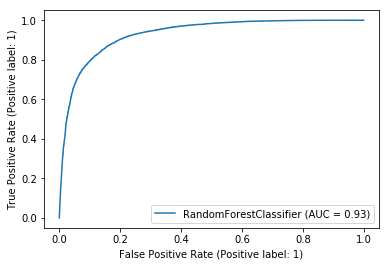

In [187]:
plot_roc_curve(rf, X_train_pca, y_train_smo)
plt.show()

In [188]:
# Making predictions for train dataset
predictions_train = rf.predict(X_train_pca)
calculate_metrics_train('RF_Basic_Train', y_train_smo, predictions_train)
print(classification_report(y_train_smo,predictions_train))

[[13814  2459]
 [ 2277 13996]]
AUC-ROC Score:  0.8544828857616911
Accuracy:  0.8544828857616912
Sensitivity:  0.8600749708105451
Recall score:  0.8600749708105451
Precision Score:  0.8505621391674263
Specificity:  0.8488908007128372
False positive Rate:  0.1511091992871628
Positive Predictive value:  0.8505621391674263
Negative Predictive value:  0.8584923249021192
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     16273
           1       0.85      0.86      0.86     16273

    accuracy                           0.85     32546
   macro avg       0.85      0.85      0.85     32546
weighted avg       0.85      0.85      0.85     32546



In [189]:
# Making predictions for test dataset
predictions_test = rf.predict(X_test_pca)
calculate_metrics_train('RF_Basic_Test', y_test, predictions_test)
print(classification_report(y_test,predictions_test))

[[5829 1145]
 [ 141  438]]
AUC-ROC Score:  0.7961477196574694
Accuracy:  0.8297365285317092
Sensitivity:  0.7564766839378239
Recall score:  0.7564766839378239
Precision Score:  0.27668982943777637
Specificity:  0.835818755377115
False positive Rate:  0.164181244622885
Positive Predictive value:  0.27668982943777637
Negative Predictive value:  0.9763819095477387
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6974
           1       0.28      0.76      0.41       579

    accuracy                           0.83      7553
   macro avg       0.63      0.80      0.65      7553
weighted avg       0.92      0.83      0.86      7553



In [190]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  DT_Best_Train_1  DT_Best_Test_1  \
AUC-ROC Score           67.512           82.081          77.534   
Accuracy                83.874           82.081          79.862   
Sensitivity             48.187           82.978          74.784   
Recall score            48.187           82.978          74.784   
Precision Score         23.308           81.515          23.949   
Specificity             86.837           81.184          80.284   

                 RF_Basic_Train  RF_Basic_Test  
AUC-ROC Score            85.448         79.615  
Accuracy                 85.448         82.974  
Sensitivity              86.007         75.648  
Recall score             86.007         75.648  
Precision Score          85.056         27.669  
Specificity              84.889         83.582

#### Inference:
- Accuracy and specificity on train and test set are within 5% range and stable.
- But the sensitivity/recall score in decreased by 10%
- Let's do some hyperparameter tuning to see if we get better results

### Hyper-parameter tuning for the Random Forest

In [191]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,10,12],
    'min_samples_leaf': [30, 50, 80,100],
    'n_estimators': [15,50,100,200], 
    'max_features': [5,8,10]
}
# Create a based model
rf_1 = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring = "accuracy")

In [192]:
%%time
grid_search.fit(X_train_pca, y_train_smo)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Wall time: 48min 8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 12], 'max_features': [5, 8, 10],
                         'min_samples_leaf': [30, 50, 80, 100],
                         'n_estimators': [15, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [193]:
# printing the optimal accuracy score
grid_search.best_score_

0.8851167201079729

In [194]:
# Best estimator
rf_best_new = grid_search.best_estimator_
rf_best_new

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=30,
                       n_estimators=200, random_state=42)

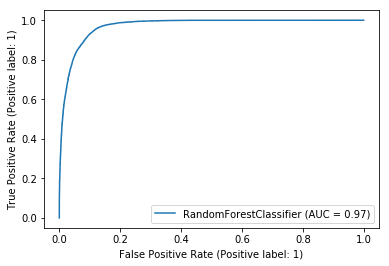

In [195]:
plot_roc_curve(rf_best_new, X_train_pca, y_train_smo)
plt.show()

In [196]:
# Making predictions
y_train_pred = rf_best_new.predict(X_train_pca)
y_test_pred = rf_best_new.predict(X_test_pca)

print(classification_report(y_train_smo, y_train_pred))
calculate_metrics_train('RF_Hyper_Train', y_train_smo, y_train_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16273
           1       0.91      0.91      0.91     16273

    accuracy                           0.91     32546
   macro avg       0.91      0.91      0.91     32546
weighted avg       0.91      0.91      0.91     32546

[[14800  1473]
 [ 1400 14873]]
AUC-ROC Score:  0.9117249431573773
Accuracy:  0.9117249431573773
Sensitivity:  0.9139679223253242
Recall score:  0.9139679223253242
Precision Score:  0.9098862106937478
Specificity:  0.9094819639894304
False positive Rate:  0.09051803601056965
Positive Predictive value:  0.9098862106937478
Negative Predictive value:  0.9135802469135802


In [197]:
print(classification_report(y_test, y_test_pred))
calculate_metrics_train('RF_Hyper_Test', y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      6974
           1       0.36      0.72      0.48       579

    accuracy                           0.88      7553
   macro avg       0.67      0.81      0.71      7553
weighted avg       0.93      0.88      0.90      7553

[[6238  736]
 [ 164  415]]
AUC-ROC Score:  0.8056090893736568
Accuracy:  0.8808420495167483
Sensitivity:  0.7167530224525043
Recall score:  0.7167530224525043
Precision Score:  0.36055603822762816
Specificity:  0.8944651562948093
False positive Rate:  0.10553484370519071
Positive Predictive value:  0.36055603822762816
Negative Predictive value:  0.9743830053108403


In [198]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  DT_Best_Train_1  DT_Best_Test_1  \
AUC-ROC Score           67.512           82.081          77.534   
Accuracy                83.874           82.081          79.862   
Sensitivity             48.187           82.978          74.784   
Recall score            48.187           82.978          74.784   
Precision Score         23.308           81.515          23.949   
Specificity             86.837           81.184          80.284   

                 RF_Basic_Train  RF_Basic_Test  RF_Hyper_Train  RF_Hyper_Test  
AUC-ROC Score            85.448         79.615          91.172         80.561  
Accuracy                 85.448         82.974          91.172         88.084  
Sensitivity              86.007         75.648          91.397         71.675  
Recall score             86.007         75.648          91.397         71.675  
Precision Score          85.056         27.669          90.989         36.056  
Specificity              84.889         83.582          90.948         89.447

#### Inference:
- Accuracy and specificity score seems to be improved after hyper parameter tuning of Random forest classifier model.
- But the sensitivity score in decreased further.
- As, we are more conserned about determining the churned customers more than detemining not churning customers. Sensitivity/ Recall is our important metric
- Let's see the performance of XGBoost Model to predict churn.

## 5.1.6 XGBoost Model

In [199]:
import xgboost as xgb
from sklearn import metrics

In [200]:
xgclf = xgb.XGBClassifier()

In [201]:
%%time

xgclf.fit(X_train_pca, y_train_smo)

[19:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 19.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_smo,
                                                              y_score=xgclf.predict_proba(X_train_pca)[:, 1]))
# Making predictions
y_train_pred = xgclf.predict(X_train_pca)
y_test_pred = xgclf.predict(X_test_pca)

print(classification_report(y_train_smo, y_train_pred))
calculate_metrics_train('XG_Basic_Train', y_train_smo, y_train_pred)

AUC on train data by XGBoost = 0.9994683066397257
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16273
           1       0.98      1.00      0.99     16273

    accuracy                           0.99     32546
   macro avg       0.99      0.99      0.99     32546
weighted avg       0.99      0.99      0.99     32546

[[15978   295]
 [   33 16240]]
AUC-ROC Score:  0.9899219566152523
Accuracy:  0.9899219566152523
Sensitivity:  0.9979721010262398
Recall score:  0.9979721010262398
Precision Score:  0.9821590565467191
Specificity:  0.9818718122042648
False positive Rate:  0.018128187795735266
Positive Predictive value:  0.9821590565467191
Negative Predictive value:  0.9979389169945663


In [203]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test_pca)[:, 1]))
# Making predictions on Test set
print(classification_report(y_test, y_test_pred))
calculate_metrics_train('XG_Basic_Test', y_test, y_test_pred)

AUC on test data by XGBoost = 0.8693843355012671
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6974
           1       0.40      0.60      0.48       579

    accuracy                           0.90      7553
   macro avg       0.68      0.76      0.71      7553
weighted avg       0.92      0.90      0.91      7553

[[6450  524]
 [ 234  345]]
AUC-ROC Score:  0.7603593510165811
Accuracy:  0.8996425261485502
Sensitivity:  0.5958549222797928
Recall score:  0.5958549222797928
Precision Score:  0.3970080552359033
Specificity:  0.9248637797533696
False positive Rate:  0.07513622024663034
Positive Predictive value:  0.3970080552359033
Negative Predictive value:  0.9649910233393177


In [204]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  DT_Best_Train_1  DT_Best_Test_1  \
AUC-ROC Score           67.512           82.081          77.534   
Accuracy                83.874           82.081          79.862   
Sensitivity             48.187           82.978          74.784   
Recall score            48.187           82.978          74.784   
Precision Score         23.308           81.515          23.949   
Specificity             86.837           81.184          80.284   

                 RF_Basic_Train  RF_Basic_Test  RF_Hyper_Train  RF_Hyper_Test  \
AUC-ROC Score            85.448         79.615          91.172         80.561   
Accuracy                 85.448         82.974          91.172         88.084   
Sensitivity              86.007         75.648          91.397         71.675   
Recall score             86.007         75.648          91.397         71.675   
Precision Score          85.056         27.669          90.989         36.056   
Specificity              84.889         83.582          90.948         89.447   

                 XG_Basic_Train  XG_Basic_Test  
AUC-ROC Score            98.992         76.036  
Accuracy                 98.992         89.964  
Sensitivity              99.797         59.585  
Recall score             99.797         59.585  
Precision Score          98.216         39.701  
Specificity              98.187         92.486

#### Inference:
- Even though the accuracy score is improved a lot as compared to other models, we can see there is drastic change in sensitivity score of train and test data.

#### Some basic hyprparameter tuning

In [205]:
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.2,0.3],
              'max_depth': [7,10],
              'min_child_weight': [1, 2],
              'n_estimators': [150,200]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                            greater_is_better=True,
                            needs_proba=True,
                            needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)


In [206]:
%%time
clf_xgb.fit(X_train_pca, y_train_smo)

[19:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 34min 47s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [207]:
# Checking the best estimators
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200}
0.9929773087842495
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [208]:
# Making predictions
xgclf = clf_xgb.best_estimator_

y_train_pred = xgclf.predict(X_train_pca)
y_test_pred = xgclf.predict(X_test_pca)

print(classification_report(y_train_smo, y_train_pred))
calculate_metrics_train('XG_1_Train', y_train_smo, y_train_pred)

print(classification_report(y_test, y_test_pred))
calculate_metrics_train('XG_1_Test', y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16273
           1       1.00      1.00      1.00     16273

    accuracy                           1.00     32546
   macro avg       1.00      1.00      1.00     32546
weighted avg       1.00      1.00      1.00     32546

[[16273     0]
 [    0 16273]]
AUC-ROC Score:  1.0
Accuracy:  1.0
Sensitivity:  1.0
Recall score:  1.0
Precision Score:  1.0
Specificity:  1.0
False positive Rate:  0.0
Positive Predictive value:  1.0
Negative Predictive value:  1.0
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6974
           1       0.45      0.55      0.49       579

    accuracy                           0.91      7553
   macro avg       0.70      0.75      0.72      7553
weighted avg       0.92      0.91      0.92      7553

[[6583  391]
 [ 262  317]]
AUC-ROC Score:  0.7457151482461627
Accuracy:  0.913544287038263
Sensitivity:  0.547495

In [209]:
# Checking the summary dataframe of Evaluation metrics
metric_data

Logistic_Basic_Train  Logistic_Basic_Test  \
AUC-ROC Score                  83.737               81.703   
Accuracy                       83.737               82.590   
Sensitivity                    84.238               80.656   
Recall score                   84.238               80.656   
Precision Score                83.402               27.964   
Specificity                    83.236               82.750   

                 Logistic_Train_0.51  Logistic_Test_0.51  DT_Basic_Train  \
AUC-ROC Score                 83.758              81.702           100.0   
Accuracy                      83.758              83.172           100.0   
Sensitivity                   83.771              79.965           100.0   
Recall score                  83.771              79.965           100.0   
Precision Score               83.750              28.616           100.0   
Specificity                   83.746              83.438           100.0   

                 DT_Basic_Test  DT_Best_Train_1  DT_Best_Test_1  \
AUC-ROC Score           67.512           82.081          77.534   
Accuracy                83.874           82.081          79.862   
Sensitivity             48.187           82.978          74.784   
Recall score            48.187           82.978          74.784   
Precision Score         23.308           81.515          23.949   
Specificity             86.837           81.184          80.284   

                 RF_Basic_Train  RF_Basic_Test  RF_Hyper_Train  RF_Hyper_Test  \
AUC-ROC Score            85.448         79.615          91.172         80.561   
Accuracy                 85.448         82.974          91.172         88.084   
Sensitivity              86.007         75.648          91.397         71.675   
Recall score             86.007         75.648          91.397         71.675   
Precision Score          85.056         27.669          90.989         36.056   
Specificity              84.889         83.582          90.948         89.447   

                 XG_Basic_Train  XG_Basic_Test  XG_1_Train  XG_1_Test  
AUC-ROC Score            98.992         76.036       100.0     74.572  
Accuracy                 98.992         89.964       100.0     91.354  
Sensitivity              99.797         59.585       100.0     54.750  
Recall score             99.797         59.585       100.0     54.750  
Precision Score          98.216         39.701       100.0     44.774  
Specificity              98.187         92.486       100.0     94.393

#### Conclusion:
- As per the problem statement, it is more important to identify churners than the non-churners accurately. Thus sensitivity/Recall which is a measure of the number of "churned" cases rightly predicted by the model is most important evaluation metric.
- Here, we have tried to build Logistic regression model, Decision Tree classifier, Random Forest Classifiers and XG Boost Model to predict churn.

##### Based on our analysis:
- Although the tree models and XG boost model provided the better Accuracy scores, they are not giving better sensitivity scre on test data. 
- The recall value is low making more mistakes in predicting the churned customers as non churned customers. So we are using logistic regression as our final model for this problem. 
- As we can see that Train Recall score of Random forest is better than Logistics Regression but Test Recall score of Logistics Regression is better as compared to Random forest. Difference in between Train and test score is less for Logistics Regression which seems model is stable.

#### Thus we recommend Logistic Regression Model for Curn Prediction using dimensionality reduction technique PCA and Sensitivity/ Recall as important evaluation metric.

## 5.2 Part 2: Interpretable Model to determine feature importance

In [210]:
# Checking the shape of Train and Test datasets
print(X_train_smo.shape)
print(X_test.shape)
print(y_train_smo.shape)
print(y_test.shape)

(32546, 97)
(7553, 97)
(32546,)
(7553,)


### Looking at Correlations

In [211]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
X_train_corr = X_train_smo.corr()
X_train_corr.loc[:,:] = np.tril(X_train_corr, k=-1)
X_train_corr = X_train_corr.stack()
X_train_corr
X_train_corr[(X_train_corr > 0.80) | (X_train_corr < -0.80)].sort_values(ascending=False)

total_count_rech_data_7   total_rech_data_7          1.000000
total_count_rech_data_6   total_rech_data_6          1.000000
total_count_rech_data_8   total_rech_data_8          1.000000
total_ic_mou_8            loc_ic_mou_8               0.975498
sachet_data_7             total_count_rech_data_7    0.972726
                          total_rech_data_7          0.972726
sachet_data_6             total_count_rech_data_6    0.970919
                          total_rech_data_6          0.970919
total_ic_mou_7            loc_ic_mou_7               0.969981
total_ic_mou_6            loc_ic_mou_6               0.969395
sachet_data_8             total_rech_data_8          0.966686
                          total_count_rech_data_8    0.966686
total_rech_amt_8          arpu_8                     0.959864
total_rech_amt_6          arpu_6                     0.946482
total_rech_amt_7          arpu_7                     0.942371
total_og_mou_6            std_og_mou_6               0.905360
total_og

In [212]:
drop_cols = ['total_count_rech_data_7', 'total_count_rech_data_8', 'total_count_rech_data_6', 'total_ic_mou_8', 'sachet_data_6',
            'sachet_data_7', 'total_ic_mou_6','total_ic_mou_7', 'sachet_data_8', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_6',
            'total_monthly_rech_amt_7', 'total_monthly_rech_amt_8', 'total_monthly_rech_amt_6', 'monthly_data_8', 'monthly_data_7',
            'monthly_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_6', 'total_rech_amt_data_6', 
            'total_rech_amt_data_7', 'total_rech_amt_data_8']

#lets drop these columns from dataset
X_train_smo.drop(drop_cols,inplace=True,axis=1)
X_test.drop(drop_cols,inplace=True,axis=1)
print(X_train_smo.shape)
print(X_test.shape)

(32546, 73)
(7553, 73)


In [213]:
# Checking the shape of Train and Test datasets
print(X_train_smo.shape)
print(X_test.shape)
print(y_train_smo.shape)
print(y_test.shape)

(32546, 73)
(7553, 73)
(32546,)
(7553,)


### 5.2.2 Model Building

In [214]:
import statsmodels.api as sm

### Model 1: Logistic Regression model considering all variables

In [215]:
# Logistic regression model
log_m = sm.GLM(y_train_smo,(sm.add_constant(X_train_smo)), family = sm.families.Binomial())
log_m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32546
Model:                            GLM   Df Residuals:                    32475
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12130.
Date:                Wed, 05 Jan 2022   Deviance:                       24259.
Time:                        19:47:56   Pearson chi2:                 1.49e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2715      0.325      3.916      0.000       0.635       1.908
arpu_6                -0.1492      0.762     -0.196      0.845      -1.643       1.345
arpu_7                -0.5230      0.935     -0.560      0.576      -2.355       1.309
arpu_8                 5.2910      1.015      5.212      0.000       3.301       7.281
onnet_mou_6           88.3340     36.229      2.438      0.015      17.326     159.342
onnet_mou_7         -111.9537     22.084     -5.069      0.000    -155.237     -68.670
onnet_mou_8            8.4732     25.896      0.327      0.744     -42.281      59.228
offnet_mou_6          93.8275     38.936      2.410      0.016      17.514     170.141
offnet_mou_7        -113.6175     22.680     -5.010      0.000    -158.069     -69.166
offnet_mou_8           8.7586     27.054      0.324      0.746     -44.266      61.783
roam_ic_mou_6         -1.0837      0.368     -2.946      0.003      -1.805      -0.363
roam_ic_mou_7          0.1203      0.359      0.336      0.737      -0.582       0.823
roam_ic_mou_8          0.4724      0.359      1.315      0.188      -0.231       1.176
roam_og_mou_6        -14.7532      6.155     -2.397      0.017     -26.817      -2.689
roam_og_mou_7         11.6526      2.301      5.064      0.000       7.143      16.163
roam_og_mou_8         -0.6605      3.347     -0.197      0.844      -7.220       5.899
loc_og_mou_6         -74.3226     30.672     -2.423      0.015    -134.438     -14.207
loc_og_mou_7          85.6161     16.939      5.054      0.000      52.416     118.816
loc_og_mou_8         -16.3422     20.417     -0.800      0.423     -56.359      23.675
std_og_mou_6        -114.8113     47.442     -2.420      0.016    -207.797     -21.826
std_og_mou_7         132.5567     25.758      5.146      0.000      82.073     183.041
std_og_mou_8         -17.1748     31.679     -0.542      0.588     -79.265      44.915
isd_og_mou_6          -1.4850      0.458     -3.241      0.001      -2.383      -0.587
isd_og_mou_7           0.5324      0.319      1.669      0.095      -0.093       1.157
isd_og_mou_8          -2.6925      0.939     -2.867      0.004      -4.533      -0.852
spl_og_mou_6          -3.0696      0.923     -3.325      0.001      -4.879      -1.260
spl_og_mou_7           1.5049      0.591      2.547      0.011       0.347       2.663
spl_og_mou_8          -0.7320      0.643     -1.139      0.255      -1.991       0.527
loc_ic_mou_6           2.5184      0.483      5.214      0.000       1.572       3.465
loc_ic_mou_7           4.8560      0.597      8.133      0.000       3.686       6.026
loc_ic_mou_8         -17.3446      0.760    -22.808      0.000     -18.835     -15.854
std_ic_mou_6           1.1033      0.303      3.636      0.000       0.509       1.698
std_ic_mou_7          -0.9364      0.4

In [216]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
col = list(X_train_smo.columns)
print(col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'night_pck_user_6', 'night_pck_user_7',

In [218]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[col].values, i) for i in range(X_train_smo[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
18        std_og_mou_6  198548.36
6         offnet_mou_6  121321.80
3          onnet_mou_6   96121.61
19        std_og_mou_7   50736.67
15        loc_og_mou_6   39345.45
20        std_og_mou_8   37042.27
7         offnet_mou_7   31161.12
4          onnet_mou_7   25280.42
8         offnet_mou_8   24738.18
5          onnet_mou_8   20191.99
17        loc_og_mou_8   12244.76
16        loc_og_mou_7   10853.54
12       roam_og_mou_6    1089.65
14       roam_og_mou_8     321.07
13       roam_og_mou_7     209.25
0               arpu_6     152.61
1               arpu_7     138.57
2               arpu_8      94.26
24        spl_og_mou_6      31.79
45    total_rech_amt_6      28.88
47    total_rech_amt_8      26.24
46    total_rech_amt_7      21.13
43    total_rech_num_7      14.39
25        spl_og_mou_7      10.74
42    total_rech_num_6      10.47
26        spl_og_mou_8      10.16
60           fb_user_6       9.92
61           fb_user_7       9.76
54     max_rech_data_6       9.17
55     max_rech_data_7       8.87
44    total_rech_num_8       8.64
28        loc_ic_mou_7       8.62
56     max_rech_data_8       8.34
62           fb_user_8       7.45
70       vol_data_mb_7       6.47
27        loc_ic_mou_6       6.36
69       vol_data_mb_6       6.05
71       vol_data_mb_8       5.72
29        loc_ic_mou_8       5.64
52   total_rech_data_7       5.05
66         arpu_data_6       4.86
67         arpu_data_7       4.75
68         arpu_data_8       4.09
51   total_rech_data_6       4.07
64            vbc_3g_7       3.86
53   total_rech_data_8       3.65
31        std_ic_mou_7       3.49
63            vbc_3g_8       3.21
10       roam_ic_mou_7       3.02
65            vbc_3g_6       2.95
48  last_day_rch_amt_6       2.95
9        roam_ic_mou_6       2.74
49  last_day_rch_amt_7       2.70
11       roam_ic_mou_8       2.70
30        std_ic_mou_6       2.59
32        std_ic_mou_8       2.58
72              aon_yr       2.47
50  last_day_rch_amt_8       2.45
37        isd_ic_mou_7       1.86
36        isd_ic_mou_6       1.65
38        isd_ic_mou_8       1.50
33        spl_ic_mou_6       1.31
40         ic_others_7       1.29
39         ic_others_6       1.25
41         ic_others_8       1.22
21        isd_og_mou_6       1.13
35        spl_ic_mou_8       1.12
34        spl_ic_mou_7       1.11
22        isd_og_mou_7       1.10
23        isd_og_mou_8       1.08
57    night_pck_user_6        NaN
58    night_pck_user_7        NaN
59    night_pck_user_8        NaN

### 5.2.3 Feature Selection Using RFE

In [219]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [220]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_smo, y_train_smo)

In [221]:
# Variables selected by RFE
col = X_train_smo.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vbc_3g_8', 'arpu_data_8',
       'vol_data_mb_8'],
      dtype='object')

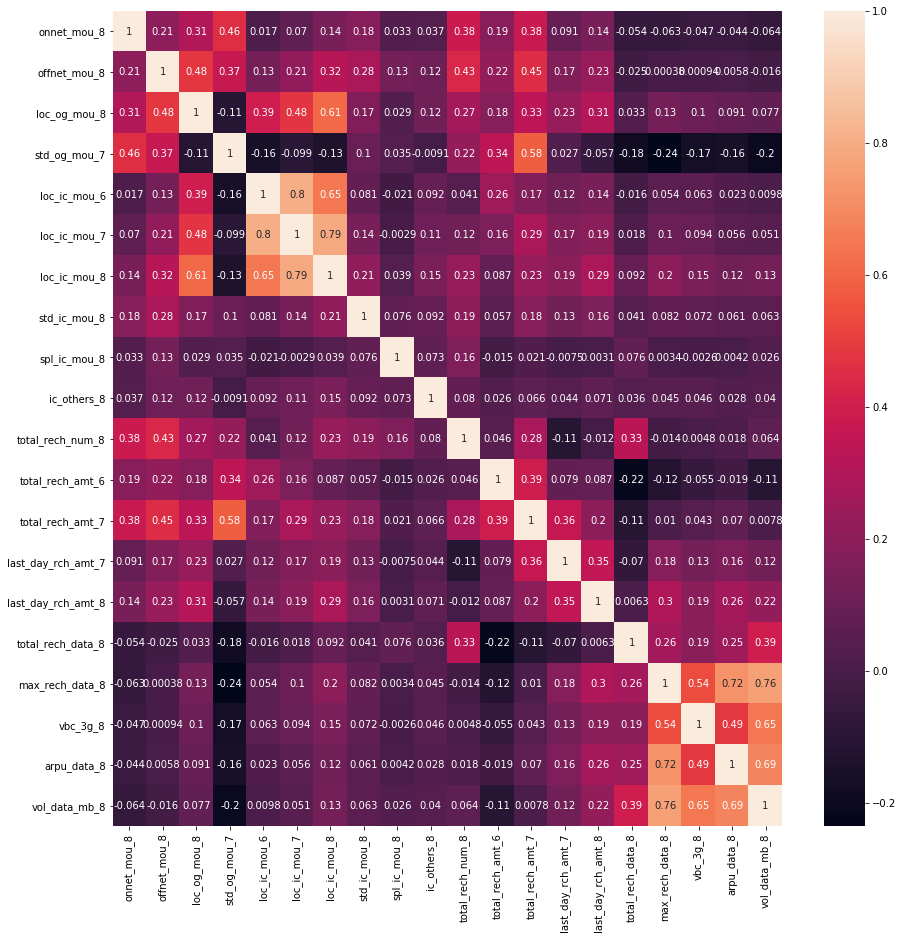

In [222]:
# To check the correlation among variables
plt.figure(figsize=(15,15))
sns.heatmap(X_train_smo[col].corr(), annot = True)
plt.show()

#### Inteference:
Here we can see some of the features are having high collinearity. Let's see what are the VIF values for those features, then we can remove them if required.

#### 1. First Training Model

In [223]:
X_train_sm = sm.add_constant(X_train_smo[col])
logm1 = sm.GLM(y_train_smo,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32546
Model:                            GLM   Df Residuals:                    32525
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12504.
Date:                Wed, 05 Jan 2022   Deviance:                       25009.
Time:                        19:49:30   Pearson chi2:                 1.32e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4054      0.042     33.627      0.000       1.323       1.487
onnet_mou_8           -4.5717      0.297    -15.398      0.000      -5.154      -3.990
offnet_mou_8          -4.3037      0.335    -12.852      0.000      -4.960      -3.647
loc_og_mou_8          -6.0073      0.552    -10.885      0.000      -7.089      -4.926
std_og_mou_7           1.8750      0.284      6.601      0.000       1.318       2.432
loc_ic_mou_6           2.3675      0.429      5.515      0.000       1.526       3.209
loc_ic_mou_7           4.7934      0.535      8.967      0.000       3.746       5.841
loc_ic_mou_8         -18.8682      0.727    -25.940      0.000     -20.294     -17.443
std_ic_mou_8          -4.3942      0.361    -12.175      0.000      -5.102      -3.687
spl_ic_mou_8         -11.3164      0.719    -15.737      0.000     -12.726      -9.907
ic_others_8           -2.8717      0.388     -7.397      0.000      -3.633      -2.111
total_rech_num_8      -5.5380      0.301    -18.401      0.000      -6.128      -4.948
total_rech_amt_6       2.7252      0.219     12.418      0.000       2.295       3.155
total_rech_amt_7       3.4082      0.295     11.570      0.000       2.831       3.986
last_day_rch_amt_7    -2.4691      0.233    -10.596      0.000      -2.926      -2.012
last_day_rch_amt_8    -4.6353      0.228    -20.334      0.000      -5.082      -4.188
total_rech_data_8     -4.6066      0.258    -17.874      0.000      -5.112      -4.101
max_rech_data_8       -2.4355      0.187    -13.051      0.000      -2.801      -2.070
vbc_3g_8              -1.9972      0.307     -6.498      0.000      -2.600      -1.395
arpu_data_8            3.1738      0.334      9.492      0.000       2.518       3.829
vol_data_mb_8         -3.0198      0.435     -6.949      0.000      -3.872      -2.168
======================================================================================
"""

#### P-values are less than 0.05,thus are acceptable.
#### Let's check the VIF values

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[col].values, i) for i in range(X_train_smo[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12    total_rech_amt_7  8.16
5         loc_ic_mou_7  7.35
4         loc_ic_mou_6  5.14
6         loc_ic_mou_8  5.05
3         std_og_mou_7  4.74
19       vol_data_mb_8  4.22
16     max_rech_data_8  3.95
11    total_rech_amt_6  3.86
2         loc_og_mou_8  3.51
10    total_rech_num_8  3.48
1         offnet_mou_8  3.09
18         arpu_data_8  2.74
0          onnet_mou_8  2.33
13  last_day_rch_amt_7  2.25
17            vbc_3g_8  2.01
14  last_day_rch_amt_8  1.86
15   total_rech_data_8  1.79
7         std_ic_mou_8  1.34
9          ic_others_8  1.08
8         spl_ic_mou_8  1.08

#### 2. Second Training Model

In [225]:
#Dropping 'Tags_Not doing further education' due to high p-value(0.999)
col = col.drop(['total_rech_amt_7','loc_ic_mou_7'], 1)

X_train_sm = sm.add_constant(X_train_smo[col])
logm2 = sm.GLM(y_train_smo,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                32546
Model:                            GLM   Df Residuals:                    32527
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12650.
Date:                Wed, 05 Jan 2022   Deviance:                       25299.
Time:                        19:49:32   Pearson chi2:                 9.05e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5578      0.040     38.511      0.000       1.479       1.637
onnet_mou_8           -5.3667      0.296    -18.154      0.000      -5.946      -4.787
offnet_mou_8          -5.0372      0.335    -15.057      0.000      -5.693      -4.381
loc_og_mou_8          -4.0647      0.518     -7.841      0.000      -5.081      -3.049
std_og_mou_7           3.9849      0.244     16.339      0.000       3.507       4.463
loc_ic_mou_6           4.9529      0.361     13.711      0.000       4.245       5.661
loc_ic_mou_8         -15.8014      0.618    -25.550      0.000     -17.014     -14.589
std_ic_mou_8          -4.1980      0.356    -11.805      0.000      -4.895      -3.501
spl_ic_mou_8         -11.5731      0.724    -15.977      0.000     -12.993     -10.153
ic_others_8           -2.7062      0.383     -7.070      0.000      -3.456      -1.956
total_rech_num_8      -4.8716      0.291    -16.743      0.000      -5.442      -4.301
total_rech_amt_6       2.7852      0.219     12.741      0.000       2.357       3.214
last_day_rch_amt_7    -1.3646      0.210     -6.508      0.000      -1.776      -0.954
last_day_rch_amt_8    -4.4768      0.224    -20.018      0.000      -4.915      -4.038
total_rech_data_8     -4.8966      0.256    -19.108      0.000      -5.399      -4.394
max_rech_data_8       -2.4893      0.186    -13.372      0.000      -2.854      -2.124
vbc_3g_8              -1.7097      0.302     -5.653      0.000      -2.302      -1.117
arpu_data_8            3.3397      0.336      9.938      0.000       2.681       3.998
vol_data_mb_8         -2.9743      0.435     -6.837      0.000      -3.827      -2.122
======================================================================================
"""

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[col].values, i) for i in range(X_train_smo[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17       vol_data_mb_8  4.22
14     max_rech_data_8  3.95
5         loc_ic_mou_8  3.61
10    total_rech_amt_6  3.52
2         loc_og_mou_8  3.27
9     total_rech_num_8  3.24
3         std_og_mou_7  3.23
4         loc_ic_mou_6  3.19
1         offnet_mou_8  3.06
16         arpu_data_8  2.73
0          onnet_mou_8  2.29
15            vbc_3g_8  2.00
11  last_day_rch_amt_7  1.87
12  last_day_rch_amt_8  1.85
13   total_rech_data_8  1.79
6         std_ic_mou_8  1.34
7         spl_ic_mou_8  1.08
8          ic_others_8  1.08

#### Inference:
- Now the VIF values are < 5 and all the P-values are also in range i.e., less than 0.05.
- We can use this model to make predictions

In [227]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.000090
1    0.002586
2    0.114442
3    0.000030
4    0.000621
5    0.097941
6    0.021669
7    0.167929
8    0.018210
9    0.632941
dtype: float64

In [228]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.00442518e-05, 2.58616331e-03, 1.14442223e-01, 2.98589756e-05,
       6.20536145e-04, 9.79409302e-02, 2.16690211e-02, 1.67929413e-01,
       1.82099589e-02, 6.32940846e-01])

In [229]:
#Creating a dataframe with the original 'Churn' flag and the 'Predicted_churn' flag value 
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})

#y_train_pred_final['Churn_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.000090          0
1      0    0.002586          0
2      0    0.114442          0
3      0    0.000030          0
4      0    0.000621          0

In [230]:
# Checking the metrics and storing them in a dataframe for further comparison
df_metric_data = pd.DataFrame()

In [231]:
# Creating a function to calculate evaluation metrics for models
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

def calculate_metrics(model, actual, predict):
    # Confusion matrix 
    confusion = metrics.confusion_matrix(actual, predict)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # AUC, ROC score
    auc_score = metrics.roc_auc_score(actual, predict)
    print('AUC-ROC Score: ',auc_score)
    df_metric_data.loc["AUC-ROC Score", model] = round(100*auc_score, 3)

    # Let's check the overall accuracy.
    acc = metrics.accuracy_score(actual, predict)
    print('Accuracy: ',metrics.accuracy_score(actual, predict))
    df_metric_data.loc["Accuracy",model] = round(100*acc, 3)

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity: ',TP / float(TP+FN))
    df_metric_data.loc["Sensitivity", model] = round(100*(TP / float(TP+FN)), 3)

    #Calculating recall score
    re = recall_score(actual, predict)
    print('Recall score: ',recall_score(actual, predict))
    df_metric_data.loc["Recall score", model] = round(100*re, 3)

    #Checking precision
    pre = precision_score(actual, predict)
    print('Precision Score: ',precision_score(actual, predict))
    df_metric_data.loc["Precision Score", model] = round(100*pre, 3)

    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))
    df_metric_data.loc["Specificity", model] = round(100*(TN / float(TN+FP)), 3)

    # Calculate false postive rate - predicting converted when customer have not converted
    print('False positive Rate: ',FP/ float(TN+FP))

    # positive predictive value 
    print('Positive Predictive value: ',TP / float(TP+FP))

    # Negative predictive value
    print('Negative Predictive value: ',TN / float(TN+ FN))

In [232]:
# calculate_metrics('Logistic_w/o_cutoff', y_train_pred_final.Churn, y_train_pred_final.predicted)

In [233]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [234]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

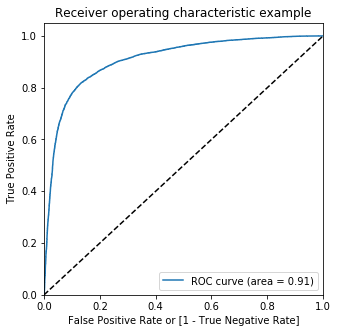

In [235]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [236]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000090          0    1    0    0    0    0    0    0    0    0   
1      0    0.002586          0    1    0    0    0    0    0    0    0    0   
2      0    0.114442          0    1    1    0    0    0    0    0    0    0   
3      0    0.000030          0    1    0    0    0    0    0    0    0    0   
4      0    0.000621          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [237]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.696706  0.973146  0.420267
0.2   0.2  0.757697  0.946353  0.569041
0.3   0.3  0.799299  0.921465  0.677134
0.4   0.4  0.824648  0.887421  0.761875
0.5   0.5  0.837246  0.848952  0.825539
0.6   0.6  0.842315  0.803540  0.881091
0.7   0.7  0.829288  0.737479  0.921096
0.8   0.8  0.793738  0.636269  0.951208
0.9   0.9  0.657992  0.333866  0.982118


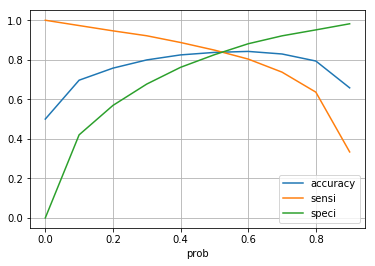

In [238]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

In [239]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000090          0    1    0    0    0    0    0    0    0    0   
1      0    0.002586          0    1    0    0    0    0    0    0    0    0   
2      0    0.114442          0    1    1    0    0    0    0    0    0    0   
3      0    0.000030          0    1    0    0    0    0    0    0    0    0   
4      0    0.000621          0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0     0     0     0     0     0     0     0     0     0  
1    0     0     0     0     0     0     0     0     0     0  
2    0     0     0     0     0     0     0     0     0     0  
3    0     0     0     0     0     0     0     0     0     0  
4    0     0     0     0     0     0     0     0     0     0

In [240]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.837246  0.848952  0.825539
0.51  0.51  0.837891  0.844282  0.831500
0.52  0.52  0.839089  0.840595  0.837584
0.53  0.53  0.840441  0.837399  0.843483
0.54  0.54  0.840472  0.832299  0.848645
0.55  0.55  0.841117  0.827751  0.854483
0.56  0.56  0.841824  0.823081  0.860567
0.57  0.57  0.842776  0.819701  0.865851
0.58  0.58  0.842715  0.815215  0.870214
0.59  0.59  0.842408  0.809255  0.875561


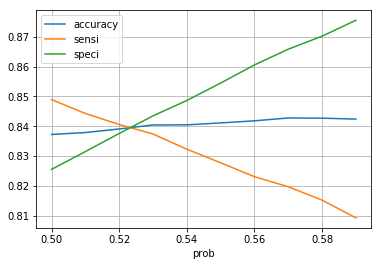

In [241]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

#### Inference:
- From above plot we can see the optimal cutoff value is approx in between 0.52 and 0.53.
- But as we are more concerned about sensitivity score let's use optimal cutoff of 0.52.

In [242]:
# Apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.000090          0    1    0    0    0    0    0    0    0    0   
1      0    0.002586          0    1    0    0    0    0    0    0    0    0   
2      0    0.114442          0    1    1    0    0    0    0    0    0    0   
3      0    0.000030          0    1    0    0    0    0    0    0    0    0   
4      0    0.000621          0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  final_predicted  
0    0     0     0     0     0     0     0     0     0     0                0  
1    0     0     0     0     0     0     0     0     0     0                0  
2    0     0     0     0     0     0     0     0     0     0                0  
3    0     0     0     0     0     0     0     0     0     0                0  
4    0     0     0     0     0     0     0     0     0     0                0

In [243]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.000090          0
1      0    0.002586          0
2      0    0.114442          0
3      0    0.000030          0
4      0    0.000621          0

In [244]:
calculate_metrics('Logistic_Train_0.52', y_train_pred_final.Churn, y_train_pred_final.predicted)

[[13630  2643]
 [ 2594 13679]]
AUC-ROC Score:  0.8390892890063295
Accuracy:  0.8390892890063295
Sensitivity:  0.8405948503656363
Recall score:  0.8405948503656363
Precision Score:  0.8380713147898542
Specificity:  0.8375837276470227
False positive Rate:  0.16241627235297731
Positive Predictive value:  0.8380713147898542
Negative Predictive value:  0.8401134122287969


#### Evaluation on test set

In [245]:
#Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.shape

(7553, 19)

In [246]:
X_test_sm.columns

Index(['const', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'vbc_3g_8', 'arpu_data_8', 'vol_data_mb_8'],
      dtype='object')

In [247]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = res.predict(X_test_sm)

In [248]:
# Storing Test data Predictions and applying cutoff
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
35502      0    0.692110          1
27295      0    0.003442          0
9431       0    0.023804          0
35790      0    0.218508          0
77184      0    0.656082          1

In [249]:
calculate_metrics('Logistic_Test_0.52', y_test_pred_final.Churn, y_test_pred_final.predicted)

[[5822 1152]
 [ 109  470]]
AUC-ROC Score:  0.8232797070589849
Accuracy:  0.8330464716006885
Sensitivity:  0.8117443868739206
Recall score:  0.8117443868739206
Precision Score:  0.28976572133168926
Specificity:  0.8348150272440493
False positive Rate:  0.16518497275595068
Positive Predictive value:  0.28976572133168926
Negative Predictive value:  0.9816219861743383


In [250]:
# Checking the summary dataframe of Evaluation metrics
df_metric_data

Logistic_Train_0.52  Logistic_Test_0.52
AUC-ROC Score                 83.909              82.328
Accuracy                      83.909              83.305
Sensitivity                   84.059              81.174
Recall score                  84.059              81.174
Precision Score               83.807              28.977
Specificity                   83.758              83.482

In [253]:
# Looking at the top 10 coefficients as per Logistic Regression Model
lr_coeffs = pd.DataFrame(res.params)
lr_coeffs.reset_index(inplace = True)
lr_coeffs.columns = ['Feature', 'coeff value']
top_10 = lr_coeffs.sort_values(['coeff value'], ascending = False).head(10)
top_10

Feature  coeff value
5         loc_ic_mou_6     4.952913
4         std_og_mou_7     3.984909
17         arpu_data_8     3.339698
11    total_rech_amt_6     2.785158
0                const     1.557813
12  last_day_rch_amt_7    -1.364614
16            vbc_3g_8    -1.709700
15     max_rech_data_8    -2.489324
9          ic_others_8    -2.706234
18       vol_data_mb_8    -2.974330

In [254]:
# Looking at the bottom 10 coefficients as per Logistic Regression Model
bot_10 = lr_coeffs.sort_values(['coeff value'], ascending = False).tail(10)
bot_10

Feature  coeff value
18       vol_data_mb_8    -2.974330
3         loc_og_mou_8    -4.064664
7         std_ic_mou_8    -4.198017
13  last_day_rch_amt_8    -4.476828
10    total_rech_num_8    -4.871629
14   total_rech_data_8    -4.896617
2         offnet_mou_8    -5.037203
1          onnet_mou_8    -5.366697
8         spl_ic_mou_8   -11.573087
6         loc_ic_mou_8   -15.801428

In [255]:
# Combining the top and bottom coefficients
lr_coef = pd.concat([top_10, bot_10], axis=0, sort=False)
lr_coef['absolute coeff'] = abs(lr_coef['coeff value'])
lr_coef.sort_values(by = 'absolute coeff', ascending = False).head(10)

Feature  coeff value  absolute coeff
6         loc_ic_mou_8   -15.801428       15.801428
8         spl_ic_mou_8   -11.573087       11.573087
1          onnet_mou_8    -5.366697        5.366697
2         offnet_mou_8    -5.037203        5.037203
5         loc_ic_mou_6     4.952913        4.952913
14   total_rech_data_8    -4.896617        4.896617
10    total_rech_num_8    -4.871629        4.871629
13  last_day_rch_amt_8    -4.476828        4.476828
7         std_ic_mou_8    -4.198017        4.198017
3         loc_og_mou_8    -4.064664        4.064664

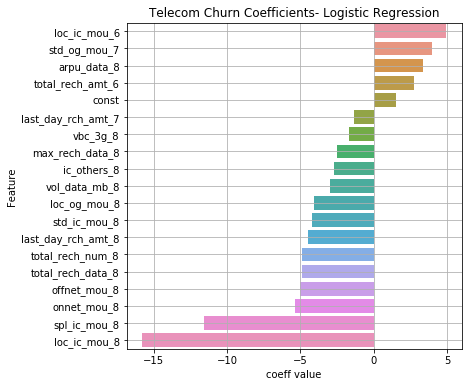

In [256]:
# Plotting the coefficients and Important features
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.barplot(x = 'coeff value', y = 'Feature', data = lr_coef)
plt.title("Telecom Churn Coefficients- Logistic Regression")
plt.grid()
plt.show()

#### Inference:
- As we can see from above plot alomost 14 features selected by Logistic regression model are from Action phase i.e., 8th month.
- Total recharge amount, number of times the recharge is done, incoming and outgoing calls etc. for month 8 are most important indicators.

In [266]:
#Preparing data for final predictions using Logistic Regression Model
high_value_data[num_vars] = scaler.transform(high_value_data[num_vars])
high_value_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0.274490  0.282575  0.143062     0.000000     0.000000     0.000000   
7   0.511879  0.571042  0.900095     0.014863     0.013093     0.013228   
8   0.323868  0.353078  0.123496     0.106303     0.084053     0.008875   
21  0.360827  0.379898  0.251576     0.026316     0.031633     0.021539   
23  0.240988  0.277259  0.182265     0.012581     0.012130     0.008495   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0       0.000000      0.000000      0.000000        0.00000       0.000000   
7       0.108417      0.132148      0.078890        0.04047       0.099664   
8       0.022634      0.018787      0.033036        0.00000       0.000000   
21      0.181224      0.208927      0.238039        0.00000       0.000000   
23      0.020422      0.020821      0.049838        0.00000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0        0.000000       0.000000       0.000000       0.000000      0.000000   
7        0.081467       0.035972       0.029115       0.074726      0.128159   
8        0.000000       0.000000       0.000000       0.000000      0.114780   
21       0.000000       0.000000       0.000000       0.000000      0.029459   
23       0.000000       0.000000       0.000000       0.000000      0.040045   

    loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0       0.000000      0.000000      0.000000      0.000000      0.000000   
7       0.166844      0.082158      0.011943      0.015422      0.016095   
8       0.090055      0.020248      0.025562      0.029448      0.020322   
21      0.029403      0.041672      0.149785      0.191834      0.194118   
23      0.041774      0.058502      0.000463      0.001303      0.008190   

    isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0            0.0      0.000000      0.000000      0.000000           0.0   
7            0.0      0.037037      0.639208      0.042812           0.0   
8            0.0      0.000000      0.000000      0.000000           0.0   
21           0.0      0.000000      0.000000      0.000000           0.0   
23           0.0      0.002058      0.000000      0.000951           0.0   

    spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0       0.000000        0.000000        0.000000        0.000000   
7       0.057223        0.091763        0.123108        0.070464   
8       0.090061        0.095684        0.087225        0.034524   
21      0.000000        0.161934        0.207886        0.215027   
23      0.155912        0.025293        0.028298        0.048192   

    loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
0       0.000000      0.000000      0.002094      0.000000      0.000000   
7       0.154168      0.134321      0.072367      0.254996      0.202277   
8       0.029340      0.009011      0.006077      0.031680      0.005446   
21      0.045157      0.033154      0.061234      0.115479      0.051668   
23      0.042023      0.065948      0.086287      0.004152      0.017402   

    std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0       0.000000        0.000000        0.000000        0.002064   
7       0.267131        0.225612        0.209631        0.162649   
8       0.001033        0.037404        0.010702        0.006275   
21      0.140398        0.074581        0.049545        0.099029   
23      0.078911        0.043065        0.083730        0.113176   

    spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
0       0.000000           0.0           0.0      0.000000      0.000000   
7       0.157895           0.0           0.0      0.011794      0.097380   
8       0.000000           0.0           0.0      0.000000      0.000000   
21      0.000000           0.0           0.0      0.000000      0.000000   
23      0.000000           0.0      

In [267]:
# Adding constants
X = sm.add_constant(high_value_data[col])
X

const  onnet_mou_8  offnet_mou_8  loc_og_mou_8  std_og_mou_7  \
0        1.0     0.000000      0.000000      0.000000      0.000000   
7        1.0     0.013228      0.078890      0.082158      0.015422   
8        1.0     0.008875      0.033036      0.020248      0.029448   
21       1.0     0.021539      0.238039      0.041672      0.191834   
23       1.0     0.008495      0.049838      0.058502      0.001303   
...      ...          ...           ...           ...           ...   
99981    1.0     0.026118      0.014872      0.048368      0.000000   
99984    1.0     0.001445      0.004420      0.005361      0.000813   
99986    1.0     0.196166      0.144132      0.393481      0.021347   
99988    1.0     0.000622      0.060111      0.041909      0.032060   
99997    1.0     0.000000      0.000000      0.000000      0.000000   

       loc_ic_mou_6  loc_ic_mou_8  std_ic_mou_8  spl_ic_mou_8  ic_others_8  \
0          0.000000      0.002094      0.000000           0.0     0.000000   
7          0.154168      0.072367      0.267131           0.0     0.657403   
8          0.029340      0.006077      0.001033           0.0     0.000000   
21         0.045157      0.061234      0.140398           0.0     0.000000   
23         0.042023      0.086287      0.078911           0.0     0.567086   
...             ...           ...           ...           ...          ...   
99981      0.136553      0.154933      0.023912           0.0     0.022145   
99984      0.030882      0.039567      0.000000           0.0     0.000000   
99986      0.204028      0.244703      0.033278           0.0     0.000000   
99988      0.110726      0.440516      0.122395           0.0     0.013461   
99997      0.000292      0.000658      0.000799           0.0     0.000000   

       total_rech_num_8  total_rech_amt_6  last_day_rch_amt_7  \
0              0.022727           0.09050            0.229508   
7              0.079545           0.39500            0.000000   
8              0.159091           0.10925            0.000000   
21             0.306818           0.15000            0.018215   
23             0.045455           0.00000            0.163024   
...                 ...               ...                 ...   
99981          0.034091           0.06300            0.000000   
99984          0.102273           0.09000            0.022769   
99986          0.034091           0.14175            0.715847   
99988          0.102273           0.09500            0.045537   
99997          0.045455           0.09525            0.163024   

       last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  vbc_3g_8  \
0                   0.252           0.045455         0.499010  0.009187   
7                   0.779           0.000000         0.000000  0.017450   
8                   0.010           0.136364         0.045545  0.006356   
21                  0.050           0.000000         0.000000  0.000000   
23                  0.000           0.090909         0.354455  0.012224   
...                   ...                ...              ...       ...   
99981               0.130           0.045455         0.499010  0.332564   
99984               0.025           0.227273         0.049505  0.000000   
99986               0.000           0.045455         0.049505  0.150336   
99988               0.050           0.045455         0.304950  0.031651   
99997               0.179           0.181818         0.354455  0.436921   

       arpu_data_8  vol_data_mb_8  
0         0.194901       0.016756  
7         0.006143       0.000000  
8         0.014964       0.001739  
21        0.006143       0.000000  
23        0.160917       0.146695  
...            ...            ...  
99981     0.194915       0.163376  
99984     0.008914       0.029373  
99986     0.006165       0.135557  
99988     0.008563       0.098703  
99997     0.542321       0.409579  

[25176 rows x 19 columns]

In [268]:
# Predicting and alloting lead score
y_pred_new = res.predict(X)
df_final = pd.DataFrame({'mobile_number':hvc_index, 'Churn_Prob':y_pred_new})
df_final['Churn_Prob'] = y_pred_new
df_final['Predicted_Churn'] = df_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
df_final.drop('Churn_Prob', inplace = True, axis = 1)
df_final.head()

mobile_number  Predicted_Churn
0      7000842753                0
7      7000701601                0
8      7001524846                1
21     7002124215                0
23     7000887461                0

In [269]:
df_final.shape

(25176, 2)

### Model 2: Random Forest considering all variables

In [257]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=7,
                             n_estimators=80)

In [258]:
%%time
rfc.fit(X_train_smo,y_train_smo)

Wall time: 11.4 s


RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=80)

In [259]:
# Making predictions for train dataset
predictions_train = rfc.predict(X_train_smo)
calculate_metrics('RF_Train_Final', y_train_smo, predictions_train)
#print(classification_report(y_train_smo,predictions_train))

[[14803  1470]
 [ 1564 14709]]
AUC-ROC Score:  0.9067780986910834
Accuracy:  0.9067780986910834
Sensitivity:  0.9038898789405764
Recall score:  0.9038898789405764
Precision Score:  0.9091414796959021
Specificity:  0.9096663184415904
False positive Rate:  0.09033368155840964
Positive Predictive value:  0.9091414796959021
Negative Predictive value:  0.904441864727806


In [260]:
# Making predictions for test dataset
predictions_test = rfc.predict(X_test)
calculate_metrics('RF_Test_Final', y_test, predictions_test)
#print(classification_report(y_test,predictions_test))

[[6258  716]
 [ 117  462]]
AUC-ROC Score:  0.8476302060503037
Accuracy:  0.8897126969416126
Sensitivity:  0.7979274611398963
Recall score:  0.7979274611398963
Precision Score:  0.3921901528013582
Specificity:  0.8973329509607112
False positive Rate:  0.10266704903928879
Positive Predictive value:  0.3921901528013582
Negative Predictive value:  0.9816470588235294


In [261]:
# Checking the summary dataframe of Evaluation metrics
df_metric_data

Logistic_Train_0.52  Logistic_Test_0.52  RF_Train_Final  \
AUC-ROC Score                 83.909              82.328          90.678   
Accuracy                      83.909              83.305          90.678   
Sensitivity                   84.059              81.174          90.389   
Recall score                  84.059              81.174          90.389   
Precision Score               83.807              28.977          90.914   
Specificity                   83.758              83.482          90.967   

                 RF_Test_Final  
AUC-ROC Score           84.763  
Accuracy                88.971  
Sensitivity             79.793  
Recall score            79.793  
Precision Score         39.219  
Specificity             89.733

In [262]:
# Creating a dataframe to store Important features and there corresponding coefficient
imp_df = pd.DataFrame({
    "Varname": X_train_smo.columns,
    "Imp": rfc.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False).head(25)

Varname       Imp
47    total_rech_amt_8  0.139229
29        loc_ic_mou_8  0.096025
11       roam_ic_mou_8  0.093701
14       roam_og_mou_8  0.083208
2               arpu_8  0.080636
17        loc_og_mou_8  0.073632
50  last_day_rch_amt_8  0.062109
44    total_rech_num_8  0.033920
8         offnet_mou_8  0.032790
56     max_rech_data_8  0.030348
53   total_rech_data_8  0.028772
71       vol_data_mb_8  0.021661
32        std_ic_mou_8  0.016091
62           fb_user_8  0.015180
5          onnet_mou_8  0.014972
10       roam_ic_mou_7  0.013936
13       roam_og_mou_7  0.012178
19        std_og_mou_7  0.009501
20        std_og_mou_8  0.009222
68         arpu_data_8  0.008206
63            vbc_3g_8  0.007533
49  last_day_rch_amt_7  0.007374
28        loc_ic_mou_7  0.006989
25        spl_og_mou_7  0.006911
18        std_og_mou_6  0.006468

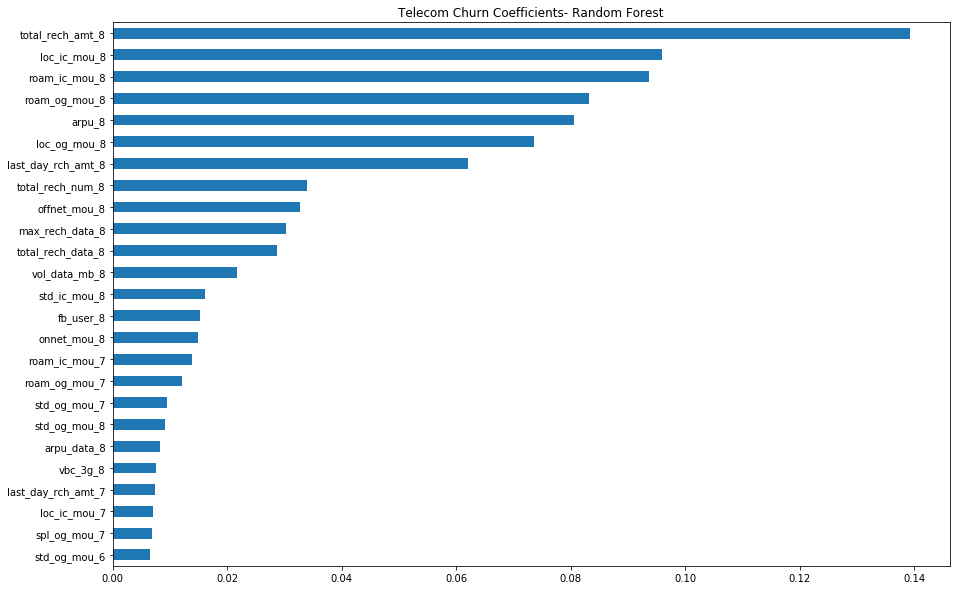

In [263]:
# Plotting first 25 top features predicted by Random Forest Model
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X_train_smo.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.title("Telecom Churn Coefficients- Random Forest")
plt.show()

#### Inference:
- We can see from above plot that, most of the 25 most important features given by random forest model are from action phase that is August month. Hence we need to focus on these features more to identify high valued churmning customers in future.
- Local incoming minutes of usage for month, total recharge amount, average revenue for month 8 have highest importance in determining churn.

## Final Conclusion:

### 1.  For Churn Prediction (Non-Interpretable Model)

- As per the problem statement, it is more important to identify churners than the non-churners accurately. Thus sensitivity/Recall which is a measure of the number of "churned" cases rightly predicted by the model is most important evaluation metric.
- Here, we have tried to build Logistic regression model, Decision Tree classifier, Random Forest Classifiers and XG Boost Model to predict churn.

##### Based on our analysis:
- Although the tree models and XG boost model provided the better Accuracy scores, they are not giving better sensitivity scre on test data. 
- The recall value is low making more mistakes in predicting the churned customers as non churned customers. So we are using logistic regression as our final model for this problem. 
- As we can see that Train Recall score of Random forest is better than Logistics Regression but Test Recall score of Logistics Regression is better as compared to Random forest. Difference in between Train and test score is less for Logistics Regression which seems model is stable.

#### Thus we recommend Logistic Regression Model for Curn Prediction using dimensionality reduction technique PCA and Sensitivity/ Recall as important evaluation metric.

In [264]:
# Summary of Evaluation Metrics for Non-Predictable Model
metric_data.T

AUC-ROC Score  Accuracy  Sensitivity  Recall score  \
Logistic_Basic_Train         83.737    83.737       84.238        84.238   
Logistic_Basic_Test          81.703    82.590       80.656        80.656   
Logistic_Train_0.51          83.758    83.758       83.771        83.771   
Logistic_Test_0.51           81.702    83.172       79.965        79.965   
DT_Basic_Train              100.000   100.000      100.000       100.000   
DT_Basic_Test                67.512    83.874       48.187        48.187   
DT_Best_Train_1              82.081    82.081       82.978        82.978   
DT_Best_Test_1               77.534    79.862       74.784        74.784   
RF_Basic_Train               85.448    85.448       86.007        86.007   
RF_Basic_Test                79.615    82.974       75.648        75.648   
RF_Hyper_Train               91.172    91.172       91.397        91.397   
RF_Hyper_Test                80.561    88.084       71.675        71.675   
XG_Basic_Train               98.992    98.992       99.797        99.797   
XG_Basic_Test                76.036    89.964       59.585        59.585   
XG_1_Train                  100.000   100.000      100.000       100.000   
XG_1_Test                    74.572    91.354       54.750        54.750   

                      Precision Score  Specificity  
Logistic_Basic_Train           83.402       83.236  
Logistic_Basic_Test            27.964       82.750  
Logistic_Train_0.51            83.750       83.746  
Logistic_Test_0.51             28.616       83.438  
DT_Basic_Train                100.000      100.000  
DT_Basic_Test                  23.308       86.837  
DT_Best_Train_1                81.515       81.184  
DT_Best_Test_1                 23.949       80.284  
RF_Basic_Train                 85.056       84.889  
RF_Basic_Test                  27.669       83.582  
RF_Hyper_Train                 90.989       90.948  
RF_Hyper_Test                  36.056       89.447  
XG_Basic_Train                 98.216       98.187  
XG_Basic_Test                  39.701       92.486  
XG_1_Train                    100.000      100.000  
XG_1_Test                      44.774       94.393

### 2. Feature Importance using Interpretable Model
- Here, we have used Logistic Regression model and Random Forest Classifier to determine Important Features to Predict Customer Churn.
- Almost all the important features given by Logistic Regression model are also provided by Random forest classifier. Coeffifient values are different for each feature according to this two models.
- Although the accuracy score of the Random forest classifier is much better than logistic model, Sensitivity score of logistic regression is much more stable for train and test data.
- Hence, we can refer to the feature importance given by Logistic regression model and their respective coefficients, which are as shown in below plot:

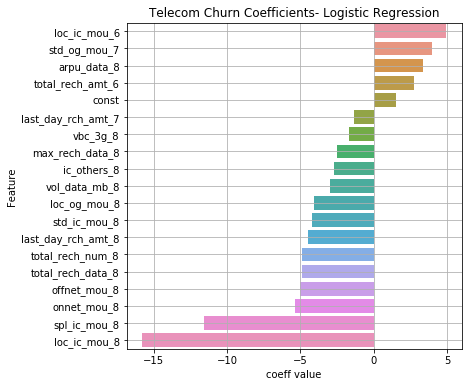

In [265]:
# Plotting the coefficients
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.barplot(x = 'coeff value', y = 'Feature', data = lr_coef)
plt.title("Telecom Churn Coefficients- Logistic Regression")
plt.grid()
plt.show()

### Business recommendations:

1. Minutes of Usage based columns.
    - Incoming and Outgoing Calls on Local and roaming for 8th month are very strong indicators of churn behaviour.
    - Minutes of usage for incoming and outgoing calls is one of the most important features. If the usage starts to decrease then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current network for few days.
    - If customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very expensive and may switch to some other network where services are in reasonable rate.
    - Here, company can work on providing special offers to such customers

2. Recharge based features
    - Total recharge amount for month 8 and last day recharge amount for month 8 is very important indicator.
    - Since we are dealing with prepaid customers, if the customer total recharges in the 8th month August is high, then he can have some balance amount left for next month, thereby reducing the chances of the customer churning
    - If the recharge amount for the month is less,then the cutomer may not be happy with the services he is getting that is why he started recharging with less amount and there are more chances of the customer churning.
    - If the customer has been consistenly recharging with a similar amount in both the good and action phases, he is more likely to stay on with the network. Therefore, the telecom company should look into it, the total recharge made by the customer should be almost as much as that in the good phase. If it's not, then the company can provide the customer with some special offers to increase the recharge amount and avaoid churning.

3. Data related features
    - Data related features like total recharge data, data recharge in MB are also very important factors.
    - If internet service the provided by the telecom company for that region is good, then customer will finish data soon and will recharge it again or the customer can recharge with higher data package available. 
    - But if network is poor and internet service is not good then customer will not be able to use the available data compltely and will not recharge data multiple times or he may recgarge with less data pack.
    - The company can look into areas having many network based complaints are high and try to solve the issues. They can even try to update available data packs based on customer usage and validity.

- Customers with less than 3 years of age of network are more likely to churn and company should concentrate more on those customers by offering them new schems.